# **MODEL INTERPRETABILITY**

# **Abstract :**

The primary goal of this study is to develop a predictive model for breast cancer prognosis and survival, leveraging a comprehensive dataset to understand the impact of various factors on cancer outcomes. This dataset is comprised of data from 4024 patients, detailing aspects such as age, race, marital status, cancer stage, tumor size, estrogen and progesterone status, number of regional nodes examined, number of positive regional nodes, survival months, and current status (alive or deceased).

In our analysis, we will undertake the following key steps to achieve our objective:

Modeling Different Stages and Grading: Apply linear and tree-based models to understand the relationship between the tumor characteristics (e.g., T Stage, N Stage, tumor size) and patient outcomes.
We will interpret the model outputs to identify the most significant predictors of survival and cancer progression.

Automated Machine Learning (AutoML): Utilize AutoML techniques to streamline the search for the most effective predictive model, comparing its performance against the manually developed models in step 1.

SHAP Analysis: Conduct SHAP (SHapley Additive exPlanations) analysis to quantify the impact of each feature on the prediction made by the models. This step will help in understanding the contribution of each variable (like age, tumor size, and hormone receptor status) to the model's output, facilitating a deeper comprehension of model decisions.

Comparative Interpretability: Compare the interpretability of different models and the insights provided by SHAP with other model explanation methods, to ascertain the most transparent and understandable predictive approach.

The dataset originates from a diverse pool of patients, with variations in age, race, and marital status, ensuring a wide applicability of the findings. Key measurements include detailed cancer staging information, hormone receptor status, and surgical outcomes, which are critical for modeling the progression and prognosis of breast cancer.

Our analysis aims to provide actionable insights into factors that significantly affect breast cancer outcomes, aiding in the development of targeted treatment plans and improving patient survival rates. By comparing various predictive models and interpretability methods, we strive to enhance the understanding and predictability of breast cancer prognosis, contributing to more personalized and effective cancer care.

# **DATASET**

The dataset includes:
 1. Total 16 columns both numerical and categorical.
 2. There are 11 categorical variables:
*   Race
*   Marital Status
*   T Stage
*   N Stage
*   Estrogen Status
*   6th Stage
*   differentiate
*   Grade
*   A Stage
*   Progesterone Status
*  Status  

3. There are 5 numerical variables:
 *   Age
 *   Tumor Size
 *   Regional Node Examined
 *   Reginol Node Positive
 *   Survival Months

4. The primary dependent variable of interest is the 'Status', which reflects the outcome of breast cancer cases.
5. The dataset encompasses 4,024 entries

# Few Installations needed to proceed with :

In [ ]:
pip install pydotplus

The pydotplus library is a Python interface to Graphviz's Dot language. It is often used in conjunction with other libraries, such as scikit-learn or networkx, for visualizing decision trees, graphs, and other structures.

If we're working with decision trees, for example, we might use pydotplus to visualize the tree generated by a machine learning model and in this assignment we are using decion tree and random forest.

# Loading Libraries

In [ ]:
#data manupulation
import pandas as pd
#numerical combination
import numpy as np
#plotting data and create visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from plotly.subplots import make_subplots
from datetime import datetime
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

from sklearn.tree import plot_tree
#pip install pydotplus
import pydotplus
from sklearn.tree import export_graphviz
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score, confusion_matrix
from sklearn import metrics

from statsmodels.stats.outliers_influence import variance_inflation_factor

import xgboost as xgb
from xgboost import plot_importance

 This code imports various Python libraries for data manipulation, numerical computation, visualization, machine learning modeling, and performance metrics. Here's a brief explanation:

Data Manipulation and Numerical Computation:

pandas: Used for data manipulation and analysis.
numpy: Handles numerical operations on arrays and matrices.
Data Visualization:

matplotlib.pyplot and seaborn: Libraries for creating static, interactive, and informative visualizations.
plotly.express: For interactive and more advanced visualizations.
make_subplots: From Plotly, used to create subplots in a single figure.
Machine Learning Workflow:

train_test_split: Splits datasets into training and testing sets.
LogisticRegression: The logistic regression model for classification tasks.
Decision Tree Visualization:

plot_tree: Visualizes a decision tree model.
pydotplus and export_graphviz: Tools for creating more detailed decision tree visualizations.
Model Performance Metrics:

accuracy_score, f1_score, confusion_matrix, metrics: Metrics to evaluate the performance of machine learning models.
Multicollinearity Check:

variance_inflation_factor: Assesses multicollinearity in regression analysis, indicating how much the variance of an estimated regression coefficient increases if your predictors are correlated.
Gradient Boosting Framework:

xgboost: Gradient boosting library for efficient and effective modeling.
plot_importance: Visualizes feature importance as determined by the XGBoost model.

In [ ]:
!pip install opendatasets

In [ ]:
data = pd.read_csv('https://raw.githubusercontent.com/NishaSirdesai09/datascience_002810901/main/Breast_Cancer.csv');

This cell loads a dataset from the provided URL using pandas read_csv function.
The dataset is assigned to the variable data, which is a pandas DataFrame.

# Datatypes(Numeric and Categorical)

In [ ]:
# Identify the data types
numeric_data = data.select_dtypes(include=['float64', 'int64'])
categorical_data = data.select_dtypes(include=['object'])

print("Numeric Columns:\n", numeric_data.columns)
print("\nCategorical Columns:\n", categorical_data.columns)

Numeric Columns:
 Index(['Age', 'Tumor Size', 'Regional Node Examined', 'Reginol Node Positive',
       'Survival Months'],
      dtype='object')

Categorical Columns:
 Index(['Race', 'Marital Status', 'T Stage ', 'N Stage', '6th Stage',
       'differentiate', 'Grade', 'A Stage', 'Estrogen Status',
       'Progesterone Status', 'Status'],
      dtype='object')


In [ ]:
# Display the first few rows of the DataFrame
data.head(10)

Age   Race Marital Status T Stage  N Stage 6th Stage  \
0   68  White        Married       T1      N1       IIA   
1   50  White        Married       T2      N2      IIIA   
2   58  White       Divorced       T3      N3      IIIC   
3   58  White        Married       T1      N1       IIA   
4   47  White        Married       T2      N1       IIB   
5   51  White        Single        T1      N1       IIA   
6   51  White        Married       T1      N1       IIA   
7   40  White        Married       T2      N1       IIB   
8   40  White       Divorced       T4      N3      IIIC   
9   69  White        Married       T4      N3      IIIC   

               differentiate Grade   A Stage  Tumor Size Estrogen Status  \
0      Poorly differentiated     3  Regional           4        Positive   
1  Moderately differentiated     2  Regional          35        Positive   
2  Moderately differentiated     2  Regional          63        Positive   
3      Poorly differentiated     3  Regional          18        Positive   
4      Poorly differentiated     3  Regional          41        Positive   
5  Moderately differentiated     2  Regional          20        Positive   
6        Well differentiated     1  Regional           8        Positive   
7  Moderately differentiated     2  Regional          30        Positive   
8      Poorly differentiated     3  Regional         103        Positive   
9        Well differentiated     1   Distant          32        Positive   

  Progesterone Status  Regional Node Examined  Reginol Node Positive  \
0            Positive                      24                      1   
1            Positive                      14                      5   
2            Positive                      14                      7   
3            Positive                       2                      1   
4            Positive                       3                      1   
5            Positive                      18                      2   
6            Positive                      11                      1   
7            Positive                       9                      1   
8            Positive                      20                     18   
9            Positive                      21                     12   

   Survival Months Status  
0               60  Alive  
1               62  Alive  
2               75  Alive  
3               84  Alive  
4               50  Alive  
5               89  Alive  
6               54  Alive  
7               14   Dead  
8               70  Alive  
9               92  Alive

This line of code displays the first ten rows of the DataFrame data.

In [ ]:
data.tail(10)

Age   Race Marital Status T Stage  N Stage 6th Stage  \
4014   40  White        Married       T3      N1      IIIA   
4015   65  White        Married       T2      N2      IIIA   
4016   54  White        Married       T2      N1       IIB   
4017   46  White        Married       T2      N1       IIB   
4018   64  White        Married       T1      N1       IIA   
4019   62  Other        Married       T1      N1       IIA   
4020   56  White       Divorced       T2      N2      IIIA   
4021   68  White        Married       T2      N1       IIB   
4022   58  Black       Divorced       T2      N1       IIB   
4023   46  White        Married       T2      N1       IIB   

                  differentiate Grade   A Stage  Tumor Size Estrogen Status  \
4014  Moderately differentiated     2  Regional          68        Positive   
4015  Moderately differentiated     2  Regional          40        Positive   
4016        Well differentiated     1  Regional          50        Positive   
4017  Moderately differentiated     2  Regional          28        Negative   
4018  Moderately differentiated     2  Regional          10        Positive   
4019  Moderately differentiated     2  Regional           9        Positive   
4020  Moderately differentiated     2  Regional          46        Positive   
4021  Moderately differentiated     2  Regional          22        Positive   
4022  Moderately differentiated     2  Regional          44        Positive   
4023  Moderately differentiated     2  Regional          30        Positive   

     Progesterone Status  Regional Node Examined  Reginol Node Positive  \
4014            Positive                      22                      2   
4015            Positive                       4                      4   
4016            Positive                      29                      2   
4017            Negative                       2                      1   
4018            Positive                      11                      1   
4019            Positive                       1                      1   
4020            Positive                      14                      8   
4021            Negative                      11                      3   
4022            Positive                      11                      1   
4023            Positive                       7                      2   

      Survival Months Status  
4014               86  Alive  
4015               68  Alive  
4016               52  Alive  
4017               19   Dead  
4018               70  Alive  
4019               49  Alive  
4020               69  Alive  
4021               69  Alive  
4022               72  Alive  
4023              100  Alive

This line of code displays the last ten rows of the DataFrame data.

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4024 entries, 0 to 4023
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Age                     4024 non-null   int64 
 1   Race                    4024 non-null   object
 2   Marital Status          4024 non-null   object
 3   T Stage                 4024 non-null   object
 4   N Stage                 4024 non-null   object
 5   6th Stage               4024 non-null   object
 6   differentiate           4024 non-null   object
 7   Grade                   4024 non-null   object
 8   A Stage                 4024 non-null   object
 9   Tumor Size              4024 non-null   int64 
 10  Estrogen Status         4024 non-null   object
 11  Progesterone Status     4024 non-null   object
 12  Regional Node Examined  4024 non-null   int64 
 13  Reginol Node Positive   4024 non-null   int64 
 14  Survival Months         4024 non-null   int64 
 15  Stat

This above snippet will basically shows the datatypes of all the paramenters used in dataset and there are 5 variables in integer form and 11 variables in object.

# Missing Values

In [ ]:
data.isnull().sum()

Age                       0
Race                      0
Marital Status            0
T Stage                   0
N Stage                   0
6th Stage                 0
differentiate             0
Grade                     0
A Stage                   0
Tumor Size                0
Estrogen Status           0
Progesterone Status       0
Regional Node Examined    0
Reginol Node Positive     0
Survival Months           0
Status                    0
dtype: int64

There are no missing values present for the dataset

In [ ]:
data.describe()

Age   Tumor Size  Regional Node Examined  \
count  4024.000000  4024.000000             4024.000000   
mean     53.972167    30.473658               14.357107   
std       8.963134    21.119696                8.099675   
min      30.000000     1.000000                1.000000   
25%      47.000000    16.000000                9.000000   
50%      54.000000    25.000000               14.000000   
75%      61.000000    38.000000               19.000000   
max      69.000000   140.000000               61.000000   

       Reginol Node Positive  Survival Months  
count            4024.000000      4024.000000  
mean                4.158052        71.297962  
std                 5.109331        22.921430  
min                 1.000000         1.000000  
25%                 1.000000        56.000000  
50%                 2.000000        73.000000  
75%                 5.000000        90.000000  
max                46.000000       107.000000

# Building and Evaluating a Linear Classification Model with Logistic Regression on Preprocessed Training and Testing Data
(Splitting the data into training and testing dataset; Linear model building using Logistic Regression)

In [ ]:
data.columns

Index(['Age', 'Race', 'Marital Status', 'T Stage ', 'N Stage', '6th Stage',
       'differentiate', 'Grade', 'A Stage', 'Tumor Size', 'Estrogen Status',
       'Progesterone Status', 'Regional Node Examined',
       'Reginol Node Positive', 'Survival Months', 'Status'],
      dtype='object')

Displaying the columns present in breast_cancer dataset

In [ ]:
data.isnull().sum()

Age                       0
Race                      0
Marital Status            0
T Stage                   0
N Stage                   0
6th Stage                 0
differentiate             0
Grade                     0
A Stage                   0
Tumor Size                0
Estrogen Status           0
Progesterone Status       0
Regional Node Examined    0
Reginol Node Positive     0
Survival Months           0
Status                    0
dtype: int64

There are no missing values present for the dataset

In [ ]:
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler, OrdinalEncoder
from sklearn.compose import ColumnTransformer

In [ ]:
columns_to_scale = ['Age', 'Tumor Size', 'Regional Node Examined', 'Reginol Node Positive', 'Survival Months'];
dummy = data.copy()

This code prepares for a machine learning task using scikit-learn:

1. It imports utilities for cross-validation (KFold, cross_val_score), splitting datasets (train_test_split), building logistic regression models (LogisticRegression), and creating pipelines (Pipeline).
2. It imports preprocessing tools (OneHotEncoder, StandardScaler, OrdinalEncoder) for transforming features.
3. It defines a list of feature names that will be scaled to standardize their values.
4. It creates a copy of the dataset, presumably for further preprocessing without altering the original data.

In [ ]:
st = StandardScaler()
data[columns_to_scale] = st.fit_transform(data[columns_to_scale])

Applies the scaler to the specified columns in data, performing both fitting (calculating the mean and variance) and transforming (standardizing) in one step.

In [ ]:
columns_to_encode = ['Race', 'Marital Status','T Stage ', 'N Stage', 'Estrogen Status', '6th Stage', 'differentiate', 'Grade', 'A Stage', 'Progesterone Status']

Lists the names of categorical columns in the dataset that need to be converted into numerical format.

In [ ]:
data = pd.get_dummies(data,columns=columns_to_encode, dtype='int')

Transforms the categorical columns listed in columns_to_encode into numerical columns with one-hot encoding and ensures the new dummy/indicator variables are of integer type.

In [ ]:
data

Age  Tumor Size  Regional Node Examined  Reginol Node Positive  \
0     1.565253   -1.253661                1.190676              -0.618172   
1    -0.443222    0.214345               -0.044095               0.164807   
2     0.449434    1.540287               -0.044095               0.556296   
3     0.449434   -0.590691               -1.525820              -0.618172   
4    -0.777968    0.498475               -1.402343              -0.618172   
...        ...         ...                     ...                    ...   
4019  0.895761   -1.016886               -1.649297              -0.618172   
4020  0.226270    0.735251               -0.044095               0.752041   
4021  1.565253   -0.401271               -0.414526              -0.226682   
4022  0.449434    0.640541               -0.414526              -0.618172   
4023 -0.889550   -0.022430               -0.908434              -0.422427   

      Survival Months Status  Race_Black  Race_Other  Race_White  \
0           -0.492961  Alive           0           0           1   
1           -0.405695  Alive           0           0           1   
2            0.161530  Alive           0           0           1   
3            0.554224  Alive           0           0           1   
4           -0.929288  Alive           0           0           1   
...               ...    ...         ...         ...         ...   
4019        -0.972921  Alive           0           1           0   
4020        -0.100266  Alive           0           0           1   
4021        -0.100266  Alive           0           0           1   
4022         0.030632  Alive           1           0           0   
4023         1.252348  Alive           0           0           1   

      Marital Status_Divorced  ...  differentiate_Undifferentiated  \
0                           0  ...                               0   
1                           0  ...                               0   
2                           1  ...                               0   
3                           0  ...                               0   
4                           0  ...                               0   
...                       ...  ...                             ...   
4019                        0  ...                               0   
4020                        1  ...                               0   
4021                        0  ...                               0   
4022                        1  ...                               0   
4023                        0  ...                               0   

      differentiate_Well differentiated  Grade_ anaplastic; Grade IV  Grade_1  \
0                                     0                            0        0   
1                                     0                            0        0   
2                                     0                            0        0   
3                                     0                            0        0   
4                                     0                            0        0   
...                                 ...                          ...      ...   
4019                                  0                            0        0   
4020                                  0                            0        0   
4021                                  0                            0        0   
4022                                  0                            0        0   
4023                                  0                            0        0   

      Grade_2  Grade_3  A Stage_Distant  A Stage_Regional  \
0           0        1                0                 1   
1           1        0                0                 1   
2           1        0                0                 1   
3           0        1                0                 1   
4           0        1                0                 1   
...       ...      ...              ...               ...   
4019        1        0      

Displays the modified DataFrame after these preprocessing steps, which now contains scaled numerical columns and one-hot encoded categorical columns.

In [ ]:
data['Status'].replace('Alive', 1, inplace=True)
data['Status'].replace('Dead', 0, inplace=True)

In [ ]:
x = data.drop('Status', axis=1);
y = data['Status']

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [ ]:
# fit Logistic Regression model to training data
logreg = LogisticRegression()
logreg.fit(x_train,y_train)

LogisticRegression()

This code snippet demonstrates a structured approach to preparing and fitting a logistic regression model for a classification problem.

- The replace method is called on the 'Status' column of the 'data' DataFrame to convert the string 'Alive' to the integer 1 and 'Dead' to the integer 0. The 'inplace=True' argument updates the DataFrame in place without the need to assign the result to a new DataFrame.

- 'x' is created by dropping the 'Status' column from 'data', to be used as the feature set for modeling.
- 'y' is assigned the 'Status' column from 'data', to be used as the target variable.

- 'train_test_split' splits 'x' and 'y' into training and test sets, with 20% of the data reserved for testing.

- A 'LogisticRegression' model named 'logreg' is instantiated and then fitted to the training data with 'logreg.fit(x_train, y_train)'.



# Log Odd Functions

In [ ]:
log_odds = logreg.coef_[0]
pd.DataFrame(log_odds,
             x_train.columns,
             columns=['coef'])\
            .sort_values(by='coef', ascending=False)

coef
Survival Months                          1.375127
Race_Other                               0.496831
T Stage _T1                              0.458996
differentiate_Well differentiated        0.354987
Grade_1                                  0.354987
N Stage_N1                               0.354402
Progesterone Status_Positive             0.280345
Regional Node Examined                   0.216968
T Stage _T2                              0.214179
Estrogen Status_Positive                 0.211731
6th Stage_IIIA                           0.199831
Marital Status_Single                    0.181178
Marital Status_Married                   0.179544
Grade_2                                  0.177399
differentiate_Moderately differentiated  0.177399
6th Stage_IIA                            0.156446
A Stage_Distant                          0.066687
Tumor Size                               0.049916
Marital Status_Divorced                  0.009184
Grade_3                                  0.003902
differentiate_Poorly differentiated      0.003902
Marital Status_Widowed                  -0.037081
A Stage_Regional                        -0.064872
Race_White                              -0.089577
6th Stage_IIIC                          -0.096635
N Stage_N3                              -0.096635
T Stage _T3                             -0.098723
6th Stage_IIIB                          -0.126182
6th Stage_IIB                           -0.131646
Age                                     -0.208507
Estrogen Status_Negative                -0.209917
N Stage_N2                              -0.255952
Progesterone Status_Negative            -0.278530
Marital Status_Separated                -0.331011
Reginol Node Positive                   -0.372992
Race_Black                              -0.405440
differentiate_Undifferentiated          -0.534473
Grade_ anaplastic; Grade IV             -0.534473
T Stage _T4                             -0.572638

This code snippet is designed to extract and display the coefficients (log odds) of a logistic regression model that's part of a machine learning pipeline.

These steps are crucial for understanding the impact of each feature on the prediction outcome:

Model Extraction: It begins by accessing the logistic regression model (logreg_model) from a pipeline named pipeline. This is achieved by referencing the specific step in the pipeline where the logistic regression model is defined ('model').

Feature Names Retrieval: Since the dataset likely includes categorical features that are one-hot encoded as part of the preprocessing step, the code retrieves the new feature names post-encoding. This is necessary because one-hot encoding transforms each categorical feature into multiple binary features, each representing a category level of the original feature.

Coefficient Extraction: The logistic regression model's coefficients for each feature are extracted (log_odds). These coefficients represent the log odds, which indicate how a one-unit increase in the feature is associated with the change in the log odds of the target variable being in one class versus another.

DataFrame Creation: A pandas DataFrame is created with these coefficients and the corresponding feature names, allowing for easy visualization and sorting of the coefficients based on their values (coef_df).

Sorting and Displaying: Finally, the DataFrame is sorted in descending order by the coefficient values and displayed. This sorting helps identify the features with the most significant positive or negative impact on the prediction.

## Convert above log odd functions to regular odds:

In [ ]:
odds = np.exp(logreg.coef_[0])
pd.DataFrame(odds,
             x_train.columns,
             columns=['coef'])\
            .sort_values(by='coef', ascending=False)

coef
Survival Months                          3.955579
Race_Other                               1.643505
T Stage _T1                              1.582485
differentiate_Well differentiated        1.426162
Grade_1                                  1.426162
N Stage_N1                               1.425328
Progesterone Status_Positive             1.323587
Regional Node Examined                   1.242304
T Stage _T2                              1.238845
Estrogen Status_Positive                 1.235816
6th Stage_IIIA                           1.221196
Marital Status_Single                    1.198629
Marital Status_Married                   1.196672
Grade_2                                  1.194108
differentiate_Moderately differentiated  1.194108
6th Stage_IIA                            1.169348
A Stage_Distant                          1.068961
Tumor Size                               1.051183
Marital Status_Divorced                  1.009226
Grade_3                                  1.003910
differentiate_Poorly differentiated      1.003910
Marital Status_Widowed                   0.963598
A Stage_Regional                         0.937187
Race_White                               0.914318
6th Stage_IIIC                           0.907888
N Stage_N3                               0.907888
T Stage _T3                              0.905993
6th Stage_IIIB                           0.881454
6th Stage_IIB                            0.876651
Age                                      0.811795
Estrogen Status_Negative                 0.810652
N Stage_N2                               0.774179
Progesterone Status_Negative             0.756895
Marital Status_Separated                 0.718198
Reginol Node Positive                    0.688671
Race_Black                               0.666684
differentiate_Undifferentiated           0.585978
Grade_ anaplastic; Grade IV              0.585978
T Stage _T4                              0.564036

This code snippet builds upon the first by converting the logistic regression model's log odds coefficients to odds, providing a more intuitive interpretation of each feature's effect:

Model and Feature Names Extraction: Similar to the first snippet, the logistic regression model is accessed from the pipeline, and the feature names are retrieved post-one-hot encoding. This ensures that the coefficients can be accurately matched to the correct feature names.

Log Odds to Odds Conversion: The np.exp() function is used to convert the log odds coefficients (log_odds) into odds (odds). This conversion is essential for interpretation, as odds are more intuitive to understand than log odds. The odds represent the ratio of the probability of the event occurring to the probability of the event not occurring.

DataFrame Creation for Odds: A new DataFrame (odds_df) is created, housing the odds for each feature. This DataFrame facilitates a straightforward comparison of the relative impact of features on the likelihood of the target variable's outcome.

Sorting and Displaying the Odds: The DataFrame is sorted in descending order based on the odds values and then printed. Features at the top have a greater positive impact on increasing the odds of the target outcome, while features at the bottom have a lesser impact or are negatively associated with the outcome.


Both code snippets are instrumental in model interpretation, offering insights into how each predictor variable influences the model's predictions, either through log odds or the more interpretable odds format.

## Tree based model building using XGBoost.

In [ ]:
xgb_cl = xgb.XGBClassifier(random_state=0)
xgb_cl.fit(x_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=0, ...)

This code snippet demonstrates fitting an XGBoost classification model to the training data:

- An instance of the XGBoost classifier `xgb_cl` is created with a defined random seed (`random_state=0`) to ensure that the model's training process is reproducible.

- The model is trained using the `fit` method with training features `x_train` and training labels `y_train`, where `x_train` contains preprocessed features, possibly including numerical representations of categorical variables, and `y_train` contains the binary encoded target variable (status).

In [ ]:
preds = xgb_cl.predict(x_test)
print(accuracy_score(y_test, preds))


0.8919254658385093


We're using the XGBoost classifier (xgb_cl) to make predictions on the test set (x_test) and then evaluating the accuracy of the predictions using the accuracy_score function.

The prediction accuracy is 89.19%.

In this code snippet:

1) xgb_cl.predict(x_test_transformed) generates predictions for the test dataset. Note that if you used x_test_transformed (preprocessed with OneHotEncoder or otherwise transformed) for fitting the model, you should also use the transformed version for making predictions. If you used the enable_categorical=True approach without additional preprocessing, use the original x_test.

2) accuracy_score(y_test_encoded, preds) computes the accuracy score by comparing the encoded true labels (y_test_encoded) with the predicted labels (preds).

3) The accuracy score is then printed out, giving you an idea of how well the model performs on unseen data.
Ensure consistency in data preprocessing steps between training and testing phases to accurately evaluate your model's performance.

# Fit the tree model and interpret the nodes


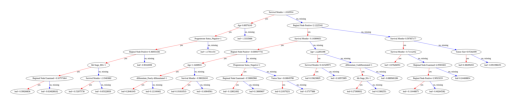

In [ ]:
import matplotlib.pyplot as plt
import xgboost as xgb

# Plot the first tree of the XGBoost model
xgb.plot_tree(xgb_cl, num_trees=0)
plt.rcParams['figure.figsize'] = [500, 100]  # Adjust figure size for better visibility
plt.show()

The plotted tree shows the decision-making process starting from the root node down to the leaves. Each node represents a decision based on one of the features, such as age, tumor size, or estrogen status. The decisions are made based on thresholds that split the data to maximize the separation of the classes (e.g., "Alive" or "Dead" in the breast cancer context).

Root Node: The top-most node (root) represents the initial split made by the model based on the feature that provides the most significant information gain at the start. For example, if the root node is based on 'Tumor Size', it means that this feature was found to be the most critical factor in determining the initial split towards predicting the outcome.

Intermediate Nodes: These nodes represent further splits based on other features. Each split aims to further segregate the data into groups with similar outcomes. The feature and threshold for splitting are chosen to maximize the purity of the nodes.

Leaf Nodes: The final nodes (leaves) represent the predictions. In classification tasks, each leaf node will be associated with a class probability. The path from the root to a leaf represents the conjunction of conditions leading to a particular prediction.

For the breast cancer dataset, interpreting the first few trees can provide insights into which features are most influential in predicting the patient's status (e.g., "Alive" or "Dead") and how different feature values contribute to these predictions. The specific paths in the tree highlight the combinations of feature conditions that are most indicative of each outcome, offering valuable insights for understanding the model's decision logic

# Second tree plotted with XGBoost algorithm

In [ ]:
import matplotlib.pyplot as plt
import xgboost as xgb

# Plot the second tree of the XGBoost model
xgb.plot_tree(xgb_cl, num_trees=1)

# Adjust the figure size for better visibility
plt.rcParams['figure.figsize'] = [300, 100]  # Adjusted to a more reasonable size

# Show the plot
plt.show()

This code snippet is for visualizing a single decision tree from a trained XGBoost model:

- It first imports the 'matplotlib.pyplot' module for plotting and the 'xgboost' module as 'xgb'.

- Using 'xgb.plot_tree', it then plots the second decision tree (trees are zero-indexed, so 'num_trees=1' refers to the second tree) of the XGBoost classifier 'xgb_cl'.

- The 'plt.rcParams' line is attempting to set the figure size to ensure the tree diagram is large enough to be visible, although the specified dimensions '[300, 100]' seem excessively large and might need to be adjusted for practical display purposes.

- Finally, 'plt.show()' is called to display the plotted tree. However, due to the very large figure size set in 'plt.rcParams', this might not display effectively and would typically require adjustment for practical use.

# Third tree plotted with XGBoost algorithm

In [ ]:
import matplotlib.pyplot as plt
import xgboost as xgb

xgb.plot_tree(xgb_cl, num_trees=2)
plt.rcParams['figure.figsize'] = [500, 100]
plt.show()

This code snippet visualizes the third decision tree (since `num_trees=2` and it is zero-indexed) from an XGBoost model:

- It imports `matplotlib.pyplot` for plotting capabilities and the `xgboost` library.
- The `xgb.plot_tree` function is called to visualize the third tree of the model `xgb_cl`.
- `plt.rcParams['figure.figsize']` sets the size of the figure to 500 units wide by 100 units tall, which is extremely large and might be impractical for most displays.
- `plt.show()` renders the figure. Given the set size, the output might not be properly displayed and could require scrolling or might not render at all depending on the system's capabilities. The figure size likely needs to be adjusted to fit your screen for proper visualization.

# **Using AutoML to find the best model**

In [ ]:
pip install -f http://h2o-release.s3.amazonaws.com/h2o/latest_stable_Py.html h2o

Looking in links: http://h2o-release.s3.amazonaws.com/h2o/latest_stable_Py.html
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 265.6/265.6 MB 2.7 MB/s eta 0:00:00


This command is used to install the `h2o` Python package, which is a machine learning platform that allows users to build parallelized machine learning models. The `-f` flag specifies a location (a URL in this case) where the package can be found. The URL provided ('http://h2o-release.s3.amazonaws.com/h2o/latest_stable_Py.html') points to H2O's repository hosted on Amazon S3, which contains links to the latest stable version of the H2O Python package.

By running this command, 'pip' will look at the specified webpage to find the H2O package and install the latest stable version available there. It's a way of directing `pip` to a specific repository that may not be on the Python Package Index (PyPI) or for installing a version of a package that might not be the one currently listed on PyPI.

In [ ]:
# Import libraries
# Use pip install or conda install if missing a library
import h2o
from h2o.automl import H2OAutoML
import random, os, sys
from datetime import datetime
import pandas as pd
import logging
import csv
import optparse
import time
import json
from distutils.util import strtobool
import psutil
import numpy as np
import matplotlib.pyplot as plt
from h2o.estimators.random_forest import H2ORandomForestEstimator


In [ ]:
# Set a minimum memory size and a run time in seconds
min_mem_size=6
run_time=222


These lines of code set up two variables, `min_mem_size` and `run_time`, intended for configuration purposes:

- `min_mem_size=6`: This sets the minimum memory size required or allocated for a certain process or application, likely measured in gigabytes (GB), but the unit isn't explicitly mentioned in the snippet.
  
- `run_time=222`: This specifies the run time limit for a process or model training session in seconds. It determines how long the process is allowed to run before it should terminate or complete.

These settings could be part of a larger script where resource allocation and time management are crucial, such as in machine learning model training with H2O, where you might want to limit the memory usage and training duration to manage computational resources efficiently.

In [ ]:
# Use 50% of availible resources
pct_memory=0.5
virtual_memory=psutil.virtual_memory()
min_mem_size=int(round(int(pct_memory*virtual_memory.available)/1073741824,0))
print(min_mem_size)

6


This code snippet calculates and prints the amount of memory to allocate for a process based on a percentage of the available system memory. Here's the breakdown:

- 'pct_memory=0.5': Sets the percentage of available virtual memory to use, in this case, 50% ('0.5').

- 'virtual_memory=psutil.virtual_memory()': Uses the 'psutil' library to fetch details about the system's virtual memory. The 'virtual_memory()' function returns an object containing various memory statistics, including the total and available memory.

- `min_mem_size=int(round(int(pct_memory*virtual_memory.available)/1073741824,0))`: This line calculates the minimum memory size to allocate:
  - `pct_memory * virtual_memory.available` computes 50% of the available memory in bytes.
  - This value is then divided by `1073741824` (the number of bytes in a gigabyte) to convert it to gigabytes.
  - `round(..., 0)` rounds this value to the nearest whole number.
  - Finally, `int(...)` ensures that the result is an integer.

- 'print(min_mem_size)': Prints the calculated minimum memory size in gigabytes, which is '6' in this context, meaning 6GB of memory can be allocated based on the current system's available resources.

This snippet is useful in scenarios where dynamic memory allocation based on current system resources is required, such as in data processing or machine learning tasks that need to adapt to varying system load conditions.

In [ ]:
# 65535 Highest port no
# Start the H2O server on a random port
port_no=random.randint(5555,55555)

#  h2o.init(strict_version_check=False,min_mem_size_GB=min_mem_size,port=port_no) # start h2o
try:
  h2o.init(strict_version_check=False,min_mem_size_GB=min_mem_size,port=port_no) # start h2o
except:
  logging.critical('h2o.init')
  h2o.download_all_logs(dirname=logs_path, filename=logfile)
  h2o.cluster().shutdown()
  sys.exit(2)

Checking whether there is an H2O instance running at http://localhost:22834..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.22" 2024-01-16; OpenJDK Runtime Environment (build 11.0.22+7-post-Ubuntu-0ubuntu222.04.1); OpenJDK 64-Bit Server VM (build 11.0.22+7-post-Ubuntu-0ubuntu222.04.1, mixed mode, sharing)
  Starting server from /usr/local/lib/python3.10/dist-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmphy7wqtm2
  JVM stdout: /tmp/tmphy7wqtm2/h2o_unknownUser_started_from_python.out
  JVM stderr: /tmp/tmphy7wqtm2/h2o_unknownUser_started_from_python.err
  Server is running at http://127.0.0.1:22834
Connecting to H2O server at http://127.0.0.1:22834 ... successful.


--------------------------  -----------------------------------------------------------------------------------------
H2O_cluster_uptime:         05 secs
H2O_cluster_timezone:       Etc/UTC
H2O_data_parsing_timezone:  UTC
H2O_cluster_version:        3.46.0.1
H2O_cluster_version_age:    4 days
H2O_cluster_name:           H2O_from_python_unknownUser_xwm1j7
H2O_cluster_total_nodes:    1
H2O_cluster_free_memory:    6 Gb
H2O_cluster_total_cores:    2
H2O_cluster_allowed_cores:  2
H2O_cluster_status:         locked, healthy
H2O_connection_url:         http://127.0.0.1:22834
H2O_connection_proxy:       {"http": null, "https": null, "colab_language_server": "/usr/colab/bin/language_service"}
H2O_internal_security:      False
Python_version:             3.10.12 final
--------------------------  -----------------------------------------------------------------------------------------

This code snippet is part of a script to initialize an H2O machine learning platform server with specific settings and error handling:

- **Port Number Selection**: The snippet starts by defining `65535` as the highest possible port number, which is a standard limit in IP-based networks. It then selects a random port number between `5555` and `55555` for the H2O server to listen on, ensuring flexibility and reducing the chance of port conflicts.

- **H2O Server Initialization**: Attempts to start the H2O server using `h2o.init()` with three specified parameters:
  - `strict_version_check=False` disables the strict version check between the H2O python package and the H2O server, allowing them to run even if the versions are not exactly matched.
  - `min_mem_size_GB=min_mem_size` sets the minimum memory size for the H2O server in gigabytes, based on the calculated value `min_mem_size` from previous operations.
  - `port=port_no` specifies the port number on which the H2O server should run, using the randomly selected `port_no`.

- **Error Handling**: The `try-except` block attempts to start the H2O server and catch any exceptions that occur during the initialization:
  - If an exception is caught, it logs a critical error message `logging.critical('h2o.init')`.
  - Downloads all H2O logs to a specified directory and file (`h2o.download_all_logs(dirname=logs_path, filename=logfile)`), which is useful for troubleshooting.
  - Shuts down the H2O cluster to clean up resources (`h2o.cluster().shutdown()`).
  - Exits the script with a status code of `2` (`sys.exit(2)`), indicating an error occurred during the H2O initialization process.

  This setup ensures that the H2O server starts with defined memory and port settings while providing a mechanism to handle initialization errors gracefully.

In [ ]:
data = h2o.import_file('https://raw.githubusercontent.com/NishaSirdesai09/datascience_002810901/main/Breast_Cancer.csv');

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


This functionality is particularly useful for directly loading datasets into H2O from remote sources without the need to download them to local storage first. It streamlines the process of getting data ready for analysis and model training within the H2O environment.

In [ ]:
data.head()

Age  Race    Marital Status    T Stage     N Stage    6th Stage    differentiate                Grade  A Stage      Tumor Size  Estrogen Status    Progesterone Status      Regional Node Examined    Reginol Node Positive    Survival Months  Status
-----  ------  ----------------  ----------  ---------  -----------  -------------------------  -------  ---------  ------------  -----------------  ---------------------  ------------------------  -----------------------  -----------------  --------
   68  White   Married           T1          N1         IIA          Poorly differentiated            3  Regional              4  Positive           Positive                                     24                        1                 60  Alive
   50  White   Married           T2          N2         IIIA         Moderately differentiated        2  Regional             35  Positive           Positive                                     14                        5                 62  Alive
   58  White   Divorced          T3          N3         IIIC         Moderately differentiated        2  Regional             63  Positive           Positive                                     14                        7                 75  Alive
   58  White   Married           T1          N1         IIA          Poorly differentiated            3  Regional             18  Positive           Positive                                      2                        1                 84  Alive
   47  White   Married           T2          N1         IIB          Poorly differentiated            3  Regional             41  Positive           Positive                                      3                        1                 50  Alive
   51  White   Single            T1          N1         IIA          Moderately differentiated        2  Regional             20  Positive           Positive                                     18                        2                 89  Alive
   51  White   Married           T1          N1         IIA          Well differentiated              1  Regional              8  Positive           Positive                                     11                        1                 54  Alive
   40  White   Married           T2          N1         IIB          Moderately differentiated        2  Regional             30  Positive           Positive                                      9                        1                 14  Dead
   40  White   Divorced          T4          N3         IIIC         Poorly differentiated            3  Regional            103  Positive           Positive                                     20                       18                 70  Alive
   69  White   Married           T4          N3         IIIC         Well differentiated              1  Distant              32  Positive           Positive                                     21                       12                 92  Alive
[10 rows x 16 columns]

In [ ]:
data.types

{'Age': 'int',
 'Race': 'enum',
 'Marital Status': 'enum',
 'T Stage ': 'enum',
 'N Stage': 'enum',
 '6th Stage': 'enum',
 'differentiate': 'enum',
 'Grade': 'int',
 'A Stage': 'enum',
 'Tumor Size': 'int',
 'Estrogen Status': 'enum',
 'Progesterone Status': 'enum',
 'Regional Node Examined': 'int',
 'Reginol Node Positive': 'int',
 'Survival Months': 'int',
 'Status': 'enum'}

The `data.types` command in H2O returns a dictionary where the keys are the column names of the `data` H2OFrame, and the values are the data types of those columns, such as 'int', 'real', 'enum' (categorical), etc.

In [ ]:
data['Status'] = data['Status'].asfactor()
print(data['Status'].isfactor())


[True]


This code converts the 'Status' column in the `data` H2OFrame to a categorical type (factor) and then checks if the conversion was successful:

- `data['Status'] = data['Status'].asfactor()`: Converts the 'Status' column to a factor (categorical type) in the H2OFrame.
- `print(data['Status'].isfactor())`: Prints `True` if the 'Status' column is now considered a factor (categorical) within the H2O environment, indicating the conversion was successful.

In [ ]:
data.describe()

Rows:4024
Cols:16

Age                Race    Marital Status    T Stage     N Stage    6th Stage    differentiate              Grade               A Stage    Tumor Size          Estrogen Status    Progesterone Status    Regional Node Examined    Reginol Node Positive    Survival Months     Status
-------  -----------------  ------  ----------------  ----------  ---------  -----------  -------------------------  ------------------  ---------  ------------------  -----------------  ---------------------  ------------------------  -----------------------  ------------------  --------
type     int                enum    enum              enum        enum       enum         enum                       int                 enum       int                 enum               enum                   int                       int                      int                 enum
mins     30.0                                                                                                        1.0                            1.0                                                           1.0                       1.0                      1.0
mean     53.97216699801193                                                                                           2.1418227215980026             30.473658051689863                                            14.35710735586481         4.158051689860833        71.29796222664015
maxs     69.0                                                                                                        3.0                            140.0                                                         61.0                      46.0                     107.0
sigma    8.963134409895774                                                                                           0.6268717614694059             21.119696090412834                                            8.099674806654747         5.109331121622227        22.921429541203217
zeros    0                                                                                                           0                              0                                                             0                         0                        0
missing  0                  0       0                 0           0          0            0                          19                  0          0                   0                  0                      0                         0                        0                   0
0        68.0               White   Married           T1          N1         IIA          Poorly differentiated      3.0                 Regional   4.0                 Positive           Positive               24.0                      1.0                      60.0                Alive
1        50.0               White   Married           T2          N2         IIIA         Moderately differentiated  2.0                 Regional   35.0                Positive           Positive               14.0                      5.0                      62.0                Alive
2        58.0               White   Divorced          T3          N3         IIIC         Moderately differentiated  2.0                 Regional   63.0                Positive           Positive               14.0                      7.0                      75.0                Alive
3        58.0               White   Married           T1          N1         IIA          Poorly differentiated      3.0                 Regional   18.0                Positive           Positive               2.0                       1.0                      84.0                Alive
4        47.0               White   Married           T2          N1         IIB          Poorly differentiated      3.0                 Regional   41.0                Positive           Positive               3.0                       1.0                      50.0                Alive
5        51.0               White   Single            T1          N1     

The `data.describe()` method in H2O generates and prints a statistical summary of all columns in the `data` H2OFrame, including counts, mean, min, max, standard deviation, and percentiles for numerical columns, as well as levels for categorical (factor) columns. The output mentioning "Rows: 4024" and "Cols: 16" indicates that the dataset consists of 4,024 observations and 16 features or variables. This summary provides a quick overview of the dataset's structure and key statistics, helping in the initial data analysis phase.

In [70]:
data.shape

(4024, 16)

This command retrieves the dimensions of the data H2OFrame, providing the number of rows and columns in the dataset, similar to how it's done in pandas for DataFrames.

In [ ]:
# Create a 80/20 train/test split
pct_rows=0.80
data_train, data_test = data.split_frame([pct_rows])

pct_rows=0.80: Sets the proportion of the dataset to include in the train split.
data_train, data_test = data.split_frame([pct_rows]): Splits the data H2OFrame into training and testing sets using the specified proportion. data_train will contain 80% of the rows, while data_test will contain the remaining 20%.

In [ ]:
print(data_train.shape)
print(data_test.shape)

(3218, 16)
(806, 16)


Printing the shapes of the training and testing sets:

print(data_train.shape): Prints the dimensions of data_train, showing the number of rows and columns.
print(data_test.shape): Prints the dimensions of data_test, also showing the number of rows and columns. This confirms the successful splitting of the dataset.

In [ ]:
data_train.head(2)

Age  Race    Marital Status    T Stage     N Stage    6th Stage    differentiate                Grade  A Stage      Tumor Size  Estrogen Status    Progesterone Status      Regional Node Examined    Reginol Node Positive    Survival Months  Status
-----  ------  ----------------  ----------  ---------  -----------  -------------------------  -------  ---------  ------------  -----------------  ---------------------  ------------------------  -----------------------  -----------------  --------
   50  White   Married           T2          N2         IIIA         Moderately differentiated        2  Regional             35  Positive           Positive                                     14                        5                 62  Alive
   58  White   Married           T1          N1         IIA          Poorly differentiated            3  Regional             18  Positive           Positive                                      2                        1                 84  Alive
[2 rows x 16 columns]

Displaying the first two rows of data_train:

data_train.head(2): Displays the first two rows of the data_train H2OFrame, providing a quick glance at the data's format and some values in the training set.

In [ ]:
# Set the features and target
X=data.columns
print(X)

['Age', 'Race', 'Marital Status', 'T Stage ', 'N Stage', '6th Stage', 'differentiate', 'Grade', 'A Stage', 'Tumor Size', 'Estrogen Status', 'Progesterone Status', 'Regional Node Examined', 'Reginol Node Positive', 'Survival Months', 'Status']


Setting the features and target:

X=data.columns: Assigns the column names of the data H2OFrame to X, essentially capturing all the features (and potentially the target variable if it's not removed).
print(X): Prints the list of all column names stored in X, which can be used to identify features and the target variable for modeling purposes, although typically you would exclude the target variable from X for actual model training.

In [ ]:
# Set target and predictor variables
y ='Status'
#y_numeric ='churn_bit'
X.remove(y)
#X.remove(y_numeric)
print(X)

['Age', 'Race', 'Marital Status', 'T Stage ', 'N Stage', '6th Stage', 'differentiate', 'Grade', 'A Stage', 'Tumor Size', 'Estrogen Status', 'Progesterone Status', 'Regional Node Examined', 'Reginol Node Positive', 'Survival Months']


Set target and predictor variables:

y = 'Status': Defines the target variable for the machine learning model as 'Status'.
X.remove(y): Removes the target variable 'Status' from the list of predictor variables X to ensure that the target variable is not used as a feature during model training.

In [ ]:
# Set up AutoML
auml = H2OAutoML(max_runtime_secs=run_time, seed=1)

Set up AutoML:

auml = H2OAutoML(max_runtime_secs=run_time, seed=1): Initializes an instance of H2O's AutoML (Automatic Machine Learning) with a specified maximum runtime (max_runtime_secs) and a seed for reproducibility. run_time is a variable previously defined that dictates how long the AutoML process can run.

In [ ]:
auml.train(x=X,y=y,training_frame=data_train)

AutoML progress: |███████████████████████████████████████████████████████████████| (done) 100%


Model Details
=============
H2OStackedEnsembleEstimator : Stacked Ensemble
Model Key: StackedEnsemble_BestOfFamily_2_AutoML_1_20240318_20833


Model Summary for Stacked Ensemble: 
key                                   value
------------------------------------  ----------------
Stacking strategy                     cross_validation
Number of base models (used / total)  3/4
# GBM base models (used / total)      1/1
# XGBoost base models (used / total)  1/1
# GLM base models (used / total)      1/1
# DRF base models (used / total)      0/1
Metalearner algorithm                 GLM
Metalearner fold assignment scheme    Random
Metalearner nfolds                    5
Metalearner fold_column
Custom metalearner hyperparameters    None

ModelMetricsBinomialGLM: stackedensemble
** Reported on train data. **

MSE: 0.06587352503261334
RMSE: 0.25665838196445745
LogLoss: 0.229126259916174
AUC: 0.9192120885051269
AUCPR: 0.7753738022044431
Gini: 0.8384241770102538
Null degrees of freedom: 3217
Residual degrees of freedom: 3214
Null deviance: 2756.0313988401704
Residual deviance: 1474.6566088204956
AIC: 1482.6566088204956

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.2943207035441172
       Alive    Dead    Error    Rate
-----  -------  ------  -------  --------------
Alive  2586     139     0.051    (139.0/2725.0)
Dead   162      331     0.3286   (162.0/493.0)
Total  2748     470     0.0935   (301.0/3218.0)

Maximum Metrics: Maximum metrics at their respective thresholds
metric                       threshold    value     idx
---------------------------  -----------  --------  -----
max f1                       0.294321     0.687435  187
max f2                       0.164091     0.727743  244
max f0point5                 0.576835     0.779651  112
max accuracy                 0.576835     0.917029  112
max precision                0.981809     1         0
max recall                   0.00779775   1         393
max specificity              0.981809     1         0
max absolute_mcc             0.503451     0.646381  129
max min_per_class_accuracy   0.141802     0.831643  258
max mean_per_class_accuracy  0.164091     0.837026  244
max tns                      0.981809     2725      0
max fns                      0.981809     492       0
max fps                      0.00299207   2725      399
max tps                      0.00779775   493       393
max tnr                      0.981809     1         0
max fnr                      0.981809     0.997972  0
max fpr                      0.00299207   1         399
max tpr                      0.00779775   1         393

Gains/Lift Table: Avg response rate: 15.32 %, avg score: 15.44 %
group    cumulative_data_fraction    lower_threshold    lift       cumulative_lift    response_rate    score       cumulative_response_rate    cumulative_score    capture_rate    cumulative_capture_rate    gain      cumulative_gain    kolmogorov_smirnov
-------  --------------------------  -----------------  ---------  -----------------  ---------------  ----------  --------------------------  ------------------  --------------  -------------------------  --------  -----------------  --------------------
1        0.0102548                   0.950242           6.52738    6.52738            1                0.959557    1                           0.959557            0.0669371       0.0669371                  552.738   552.738            0.0669371
2        0.0201989                   0.922912           6.52738    6.52738            1                0.934333    1                           0.947139            0.0649087       0.131846                   552.738   552.738            0.131846
3        0.0301429                   0.893358           6.52738    6.52738            1                0.907613    1                           0.9341              0.0649087       0.196755                   552.738   552.738            0.196755
4        0.040087                    0.867296           6.11942    6.42618            0.93

auml.train(x=X, y=y, training_frame=data_train): Trains the AutoML model using the training data frame data_train, with X specifying the predictor variables and y specifying the target variable. This command instructs AutoML to automatically try various models and preprocessing steps to find the best performing model based on the given dataset.

In [ ]:
print(auml.leaderboard)

model_id                                                     auc    logloss     aucpr    mean_per_class_error      rmse        mse
StackedEnsemble_BestOfFamily_2_AutoML_1_20240318_20833  0.871847   0.267368  0.701352                0.222096  0.275405  0.0758477
StackedEnsemble_BestOfFamily_1_AutoML_1_20240318_20833  0.871795   0.26766   0.70041                 0.222279  0.275535  0.0759197
StackedEnsemble_BestOfFamily_4_AutoML_1_20240318_20833  0.871556   0.266591  0.703362                0.220725  0.275074  0.0756657
GBM_grid_1_AutoML_1_20240318_20833_model_7              0.871424   0.267064  0.704145                0.221545  0.274884  0.0755613
StackedEnsemble_BestOfFamily_3_AutoML_1_20240318_20833  0.870543   0.268203  0.700729                0.220888  0.275656  0.0759861
StackedEnsemble_AllModels_1_AutoML_1_20240318_20833     0.870281   0.268495  0.699704                0.229022  0.276124  0.0762445
StackedEnsemble_AllModels_2_AutoML_1_20240318_20833     0.870272   0.26814   0.7017

print(auml.leaderboard): Prints the AutoML leaderboard, which shows the performance of all models tried during the AutoML process, ranked from best to worst. This allows you to see which models performed best and how they compare to each other.

In [ ]:
model_index=0
glm_index=0
glm_model=''
auml_leaderboard_df=auml.leaderboard.as_data_frame()
models_dict={}
for m in auml_leaderboard_df['model_id']:
  models_dict[m]=model_index
  if 'StackedEnsemble' not in m:
    break
  model_index=model_index+1

for m in auml_leaderboard_df['model_id']:
  if 'GLM' in m:
    models_dict[m]=glm_index
    break
  glm_index=glm_index+1
models_dict

/usr/local/lib/python3.10/dist-packages/h2o/frame.py:1983: H2ODependencyWarning: Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using multi-thread, install datatable (for Python 3.9 or lower), or polars and pyarrow (for Python 3.10 or above) and activate it using:

with h2o.utils.threading.local_context(polars_enabled=True, datatable_enabled=True):
    pandas_df = h2o_df.as_data_frame()

  warnings.warn("Converting H2O frame to pandas dataframe using single-thread.  For faster conversion using"


{'StackedEnsemble_BestOfFamily_2_AutoML_1_20240318_20833': 0,
 'StackedEnsemble_BestOfFamily_1_AutoML_1_20240318_20833': 1,
 'StackedEnsemble_BestOfFamily_4_AutoML_1_20240318_20833': 2,
 'GBM_grid_1_AutoML_1_20240318_20833_model_7': 3,
 'GLM_1_AutoML_1_20240318_20833': 16}

Initialize Indices and Storage:

model_index=0 and glm_index=0 are initialized to track the indices of models in the leaderboard.
glm_model='' initializes a string variable intended for storing the GLM model ID, but it's not used in the given snippet.
auml_leaderboard_df=auml.leaderboard.as_data_frame() converts the AutoML leaderboard to a pandas DataFrame for easier processing.
Extract the Best Non-Stacked Ensemble Model:

The first loop iterates over model IDs in the leaderboard, looking for the first model that is not a Stacked Ensemble. This model's index is saved, and the loop breaks once this model is found, assuming this is the "best" non-ensemble model.
models_dict is a dictionary that maps each model ID to its index in the leaderboard, but it's specifically used here to find the first non-ensemble model.
Find the First GLM Model:

The second loop iterates over the model IDs again, this time looking for the first model that includes 'GLM' in its ID. The index of this model is saved, and the loop breaks once found.
Models Dictionary:

models_dict ends up storing indices for models based on their appearance in the leaderboard: it initially aims to mark the position of the first non-ensemble model and then marks the position of the first GLM model.

In [ ]:
print(model_index)
best_model = h2o.get_model(auml.leaderboard[model_index,'model_id'])

3


Print Model Index and Get Best Model:

print(model_index) prints the index of the first non-Stacked Ensemble model.
best_model = h2o.get_model(auml.leaderboard[model_index,'model_id']) retrieves the model object from H2O's server using the model ID at the model_index position in the leaderboard. This step seems to contain a potential issue: the correct way to access the model ID from the leaderboard would require converting the leaderboard to a pandas DataFrame or a similar approach, not directly indexing into auml.leaderboard

# Confusion Matrix

> Confusion matrix shows a predicted class vs an actual class.

## GBM_grid_1_AutoML_1_20240318_20833_model_7

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.4466893891578932
       Alive    Dead    Error    Rate
-----  -------  ------  -------  --------------
Alive  2680     45      0.0165   (45.0/2725.0)
Dead   204      289     0.4138   (204.0/493.0)
Total  2884     334     0.0774   (249.0/3218.0)

# Learning Curve Plot

> Learning curve plot shows the loss function/metric dependent on number of iterations or trees for tree-based algorithms. This plot can be useful for determining whether the model overfits.

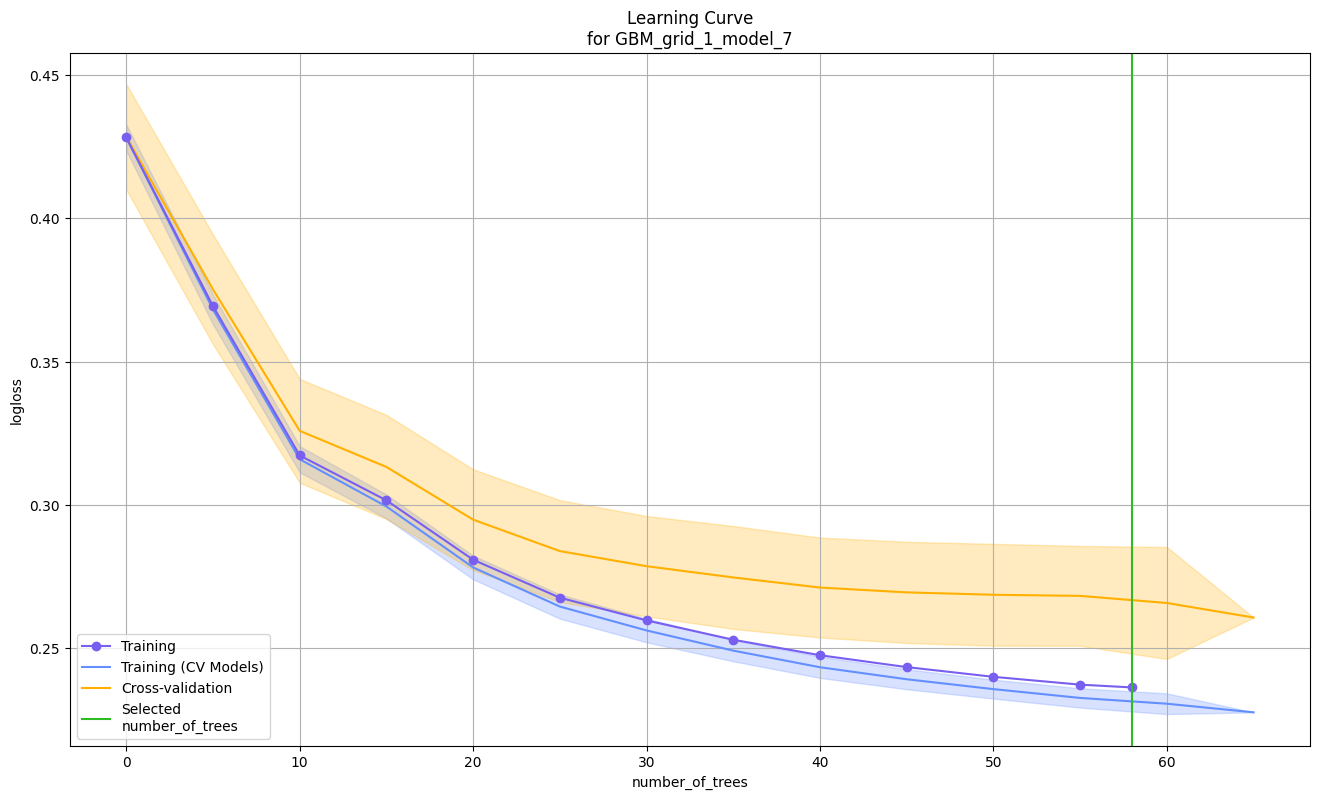

# Variable Importance

> The variable importance plot shows the relative importance of the most important variables in the model.

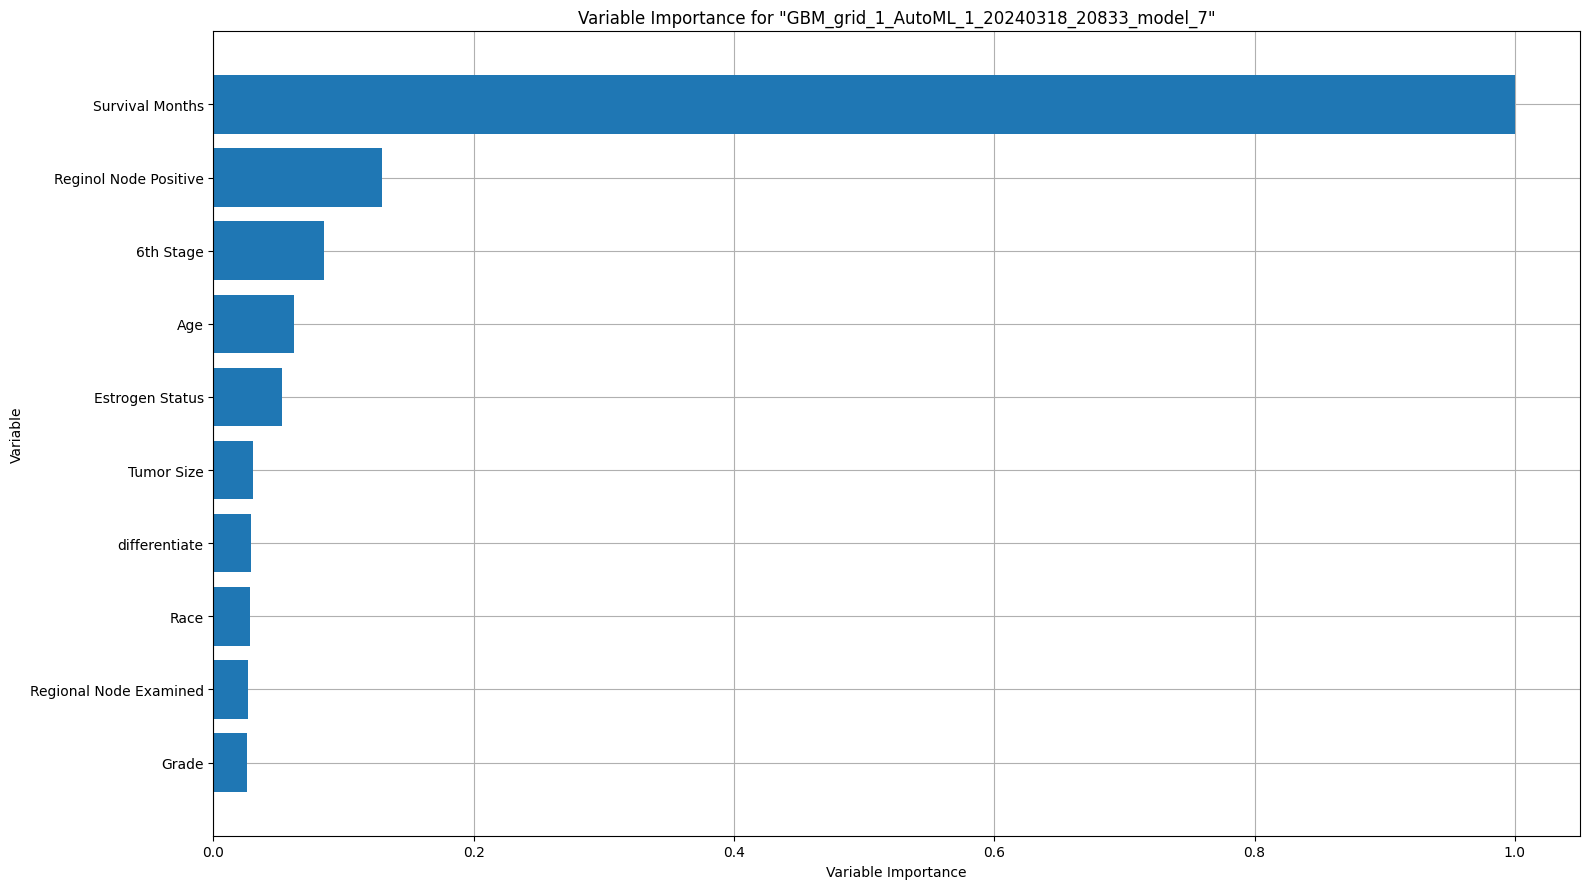

# SHAP Summary

> SHAP summary plot shows the contribution of the features for each instance (row of data). The sum of the feature contributions and the bias term is equal to the raw prediction of the model, i.e., prediction before applying inverse link function.

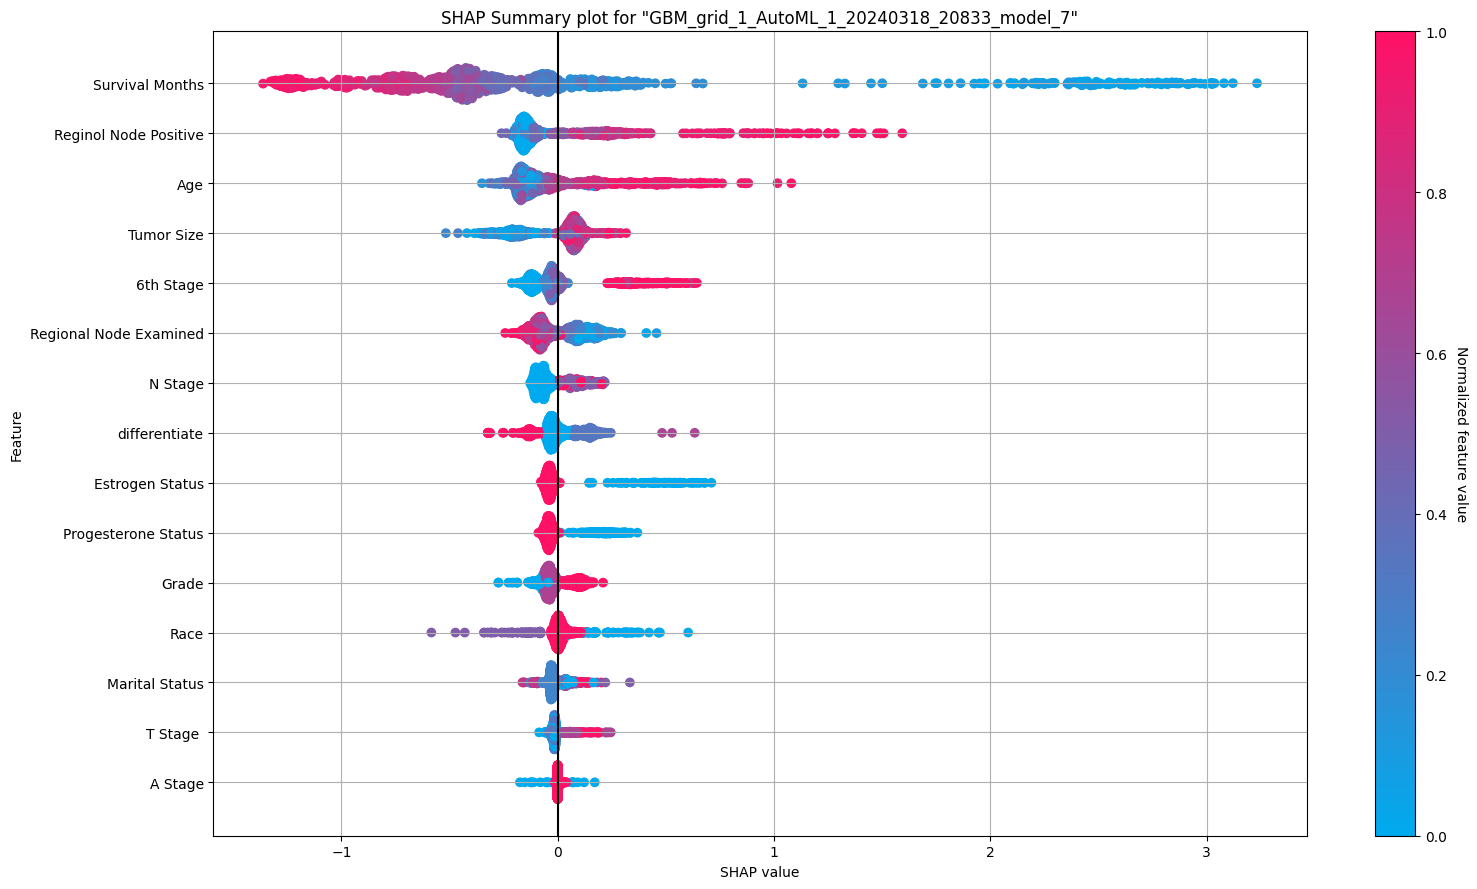

# Partial Dependence Plots

> Partial dependence plot (PDP) gives a graphical depiction of the marginal effect of a variable on the response. The effect of a variable is measured in change in the mean response. PDP assumes independence between the feature for which is the PDP computed and the rest.

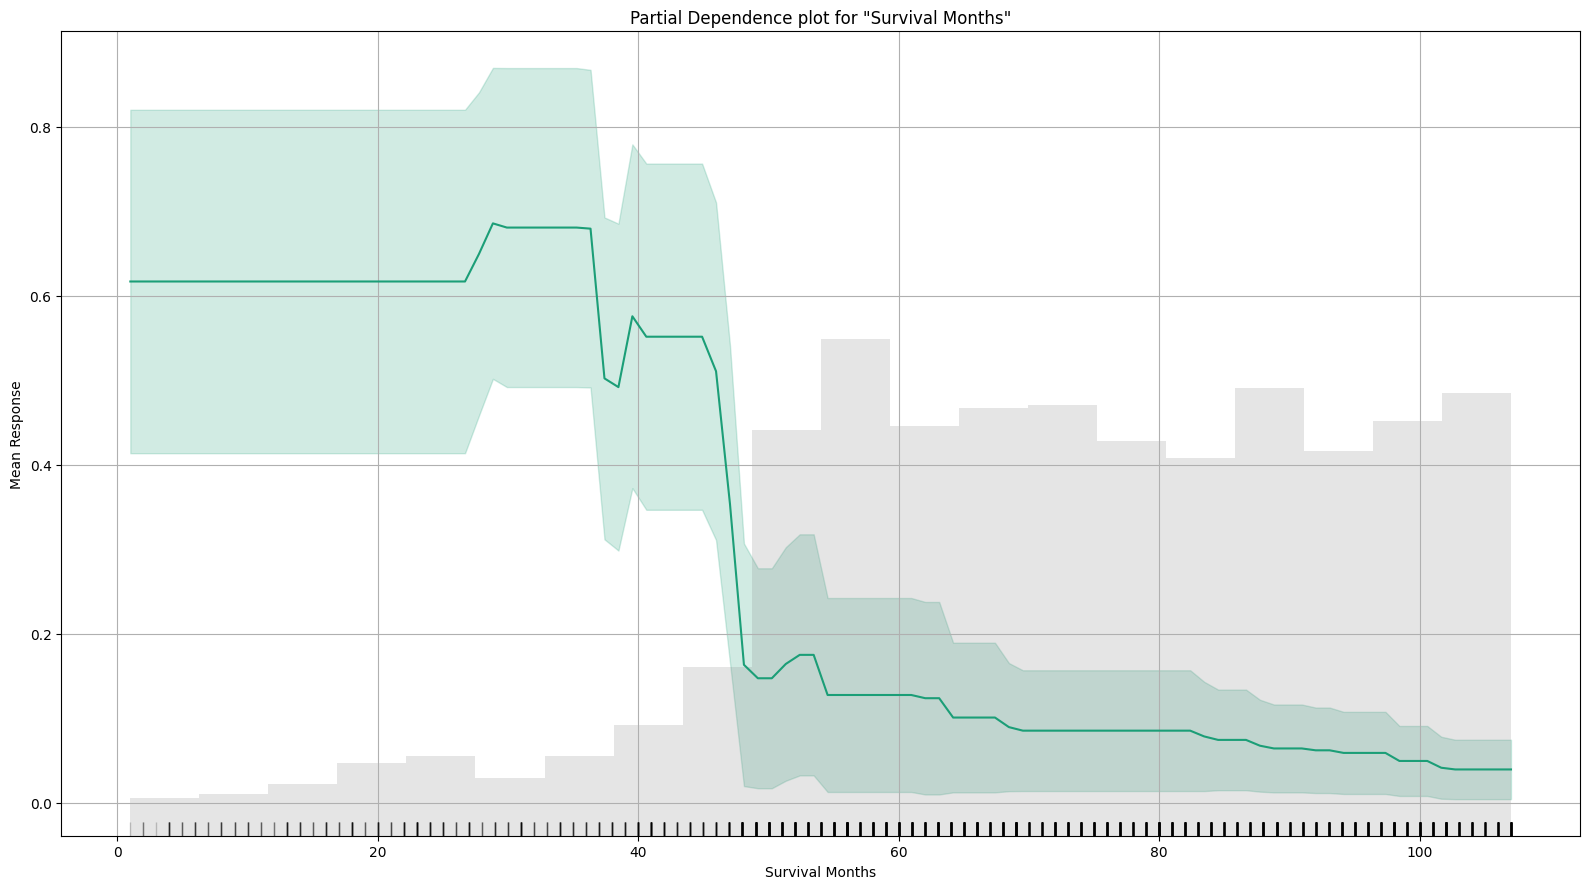

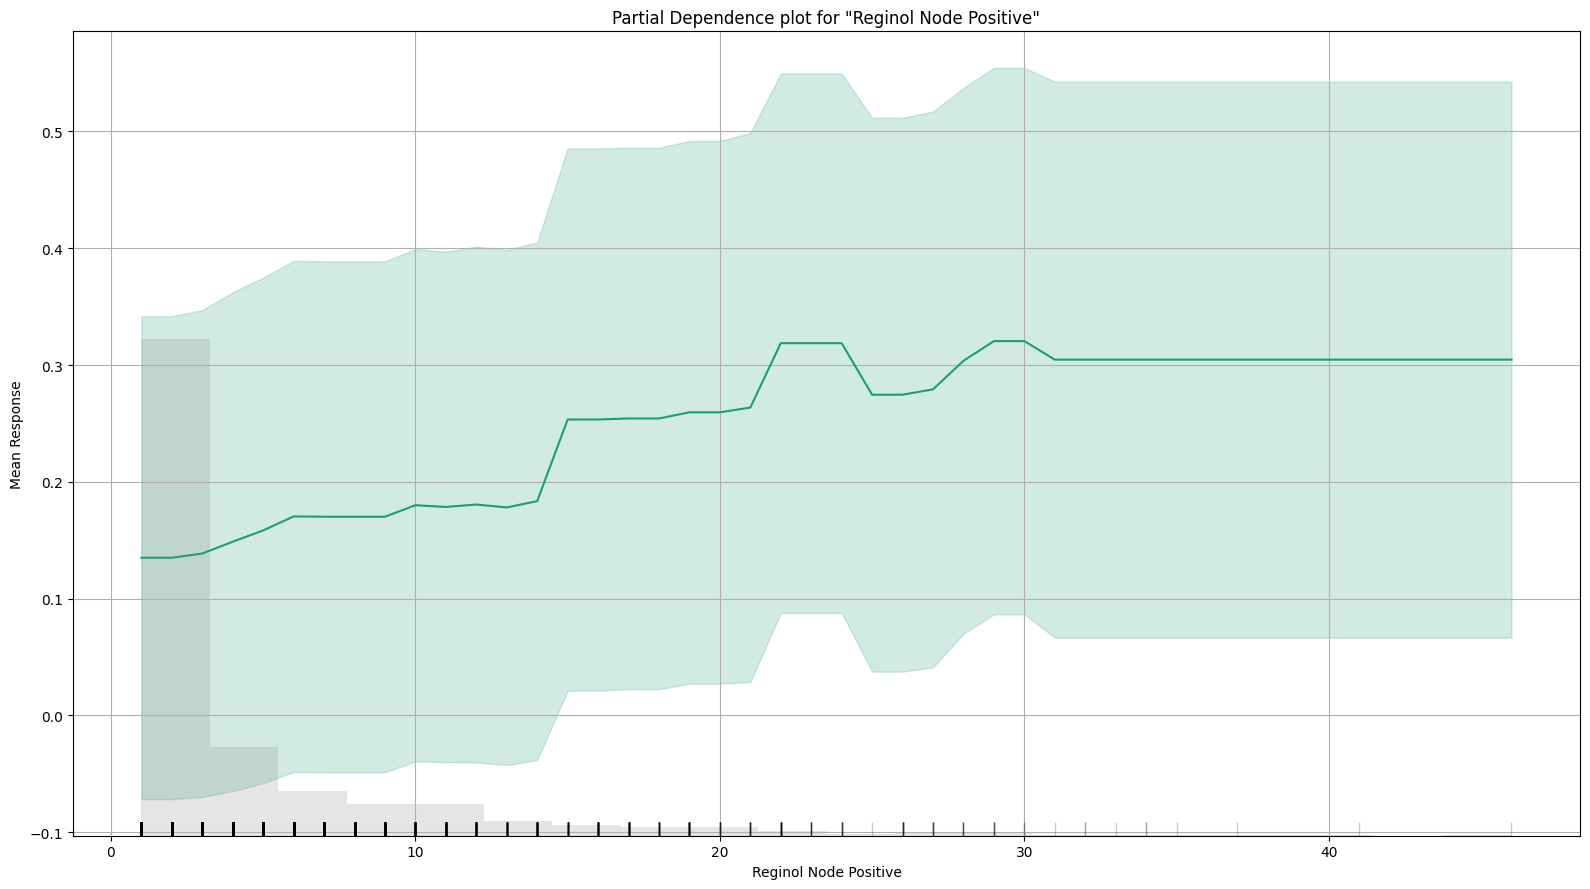

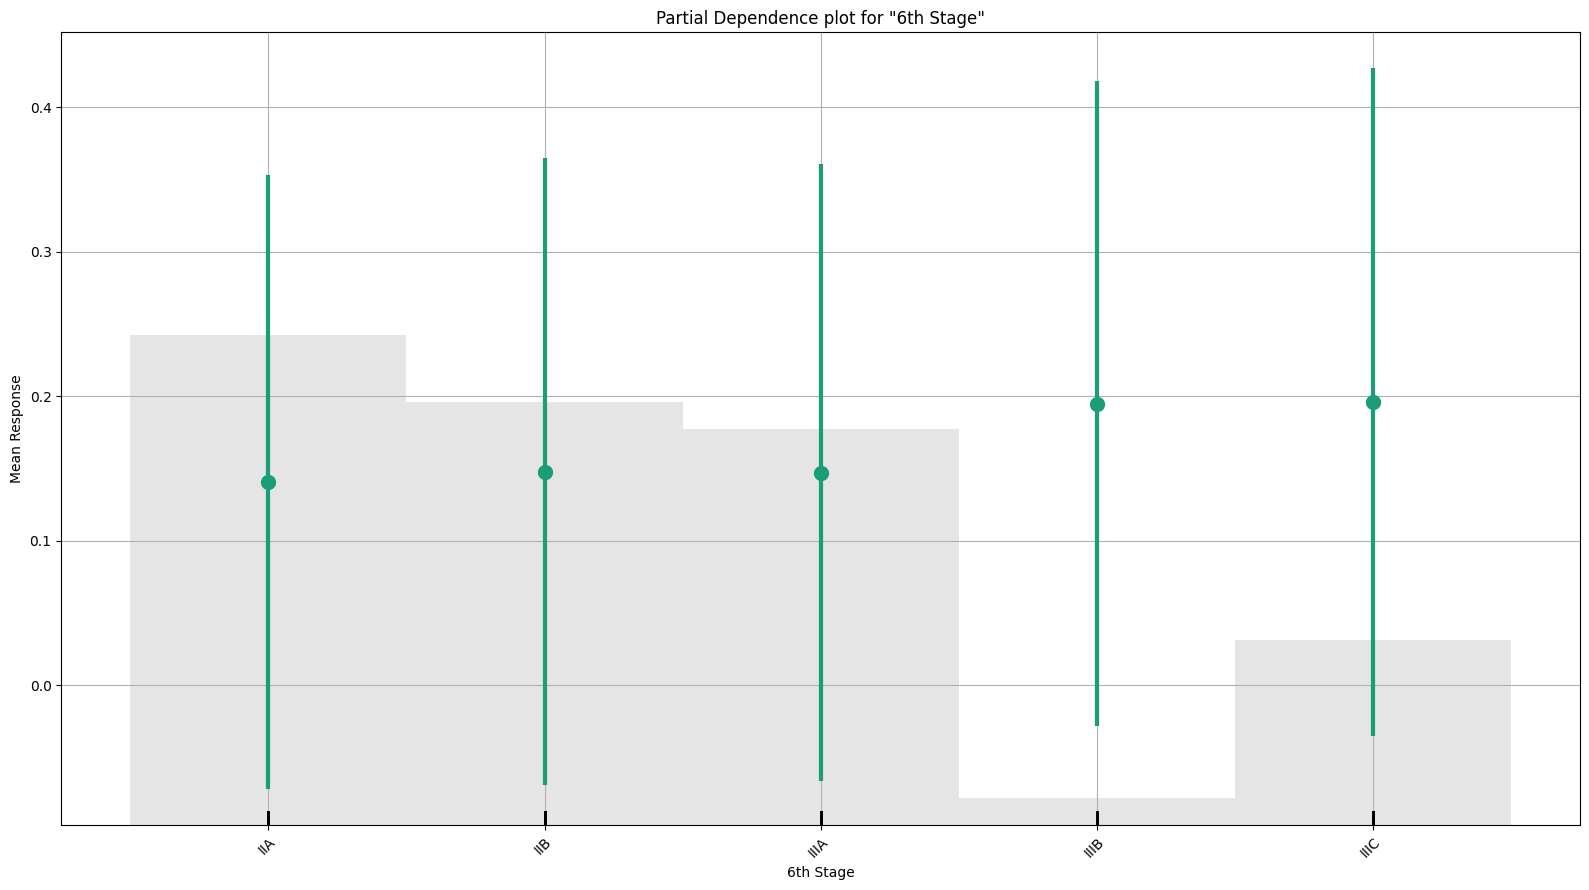

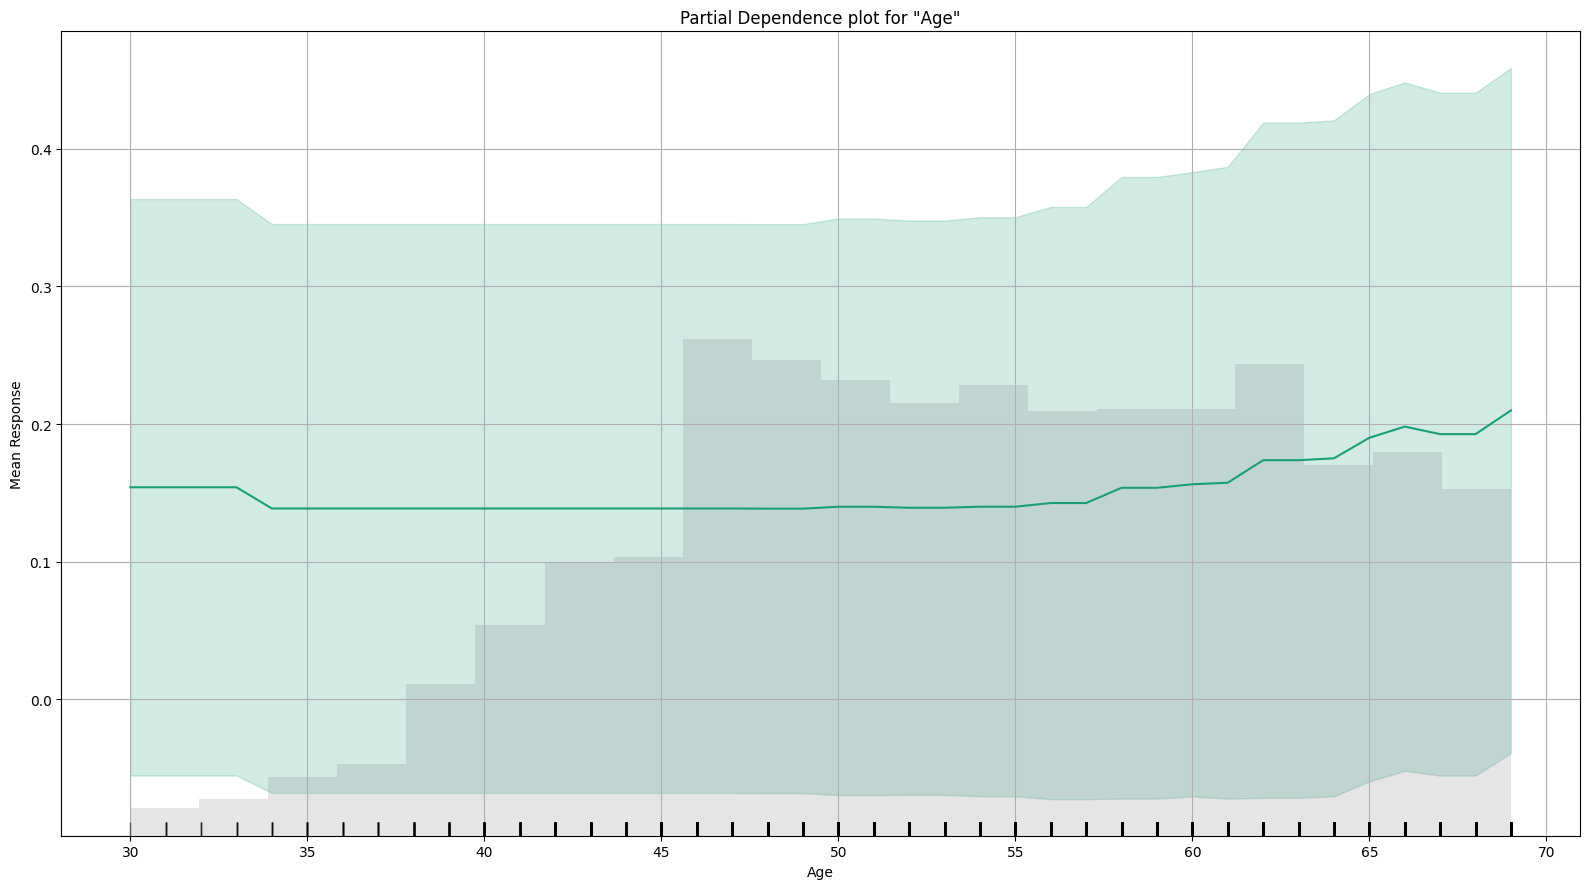

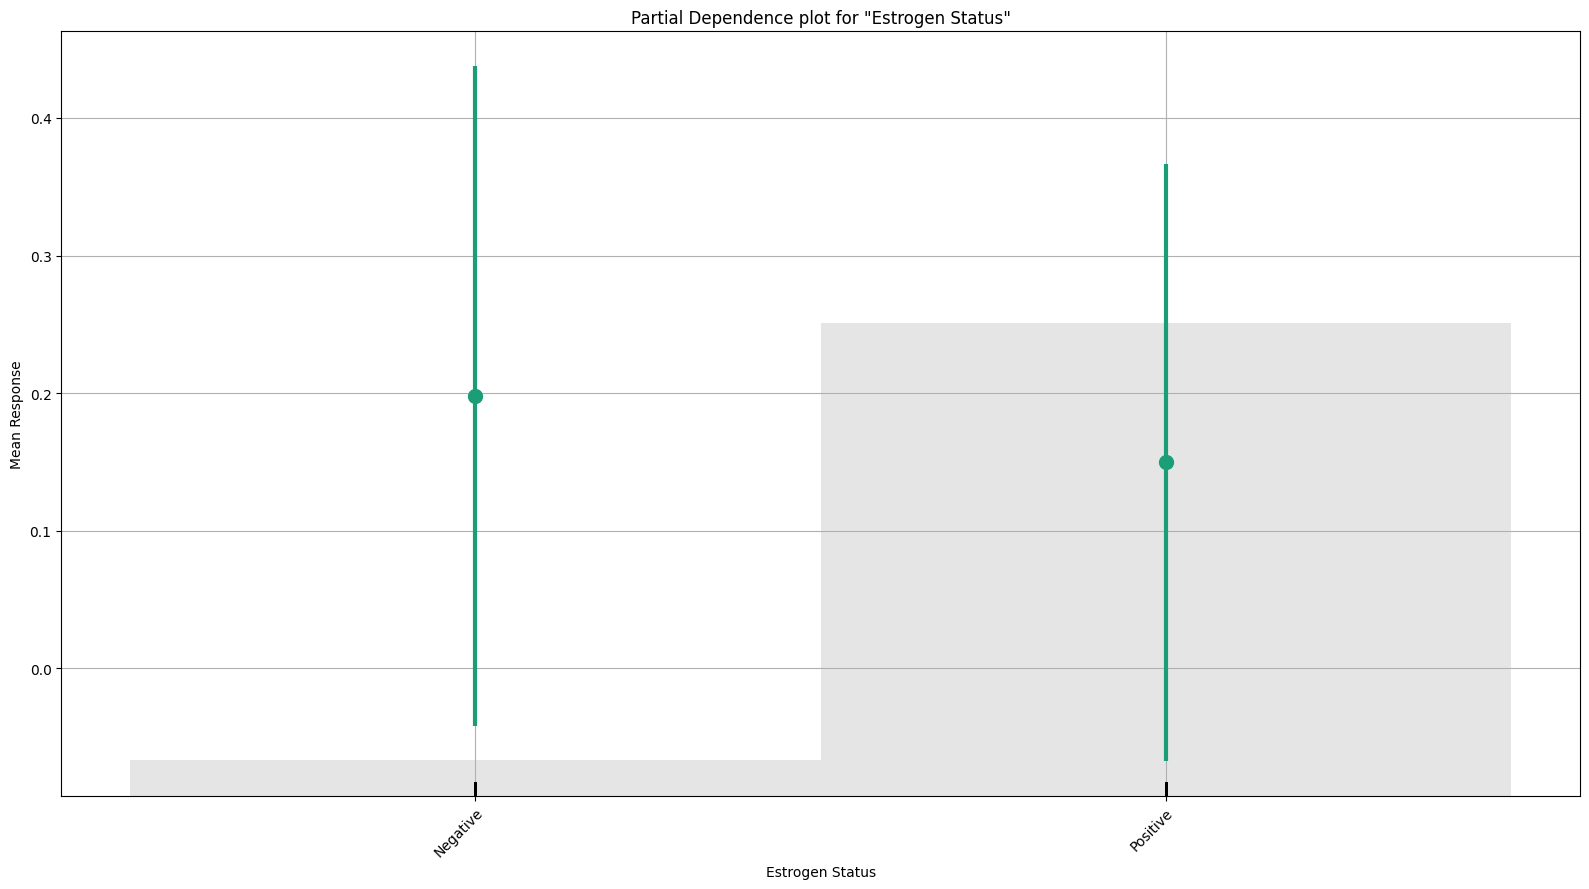

# Confusion Matrix

> Confusion matrix shows a predicted class vs an actual class.

## GBM_grid_1_AutoML_1_20240318_20833_model_7

Confusion Matrix (Act/Pred) for max f1 @ threshold = 0.4466893891578932
       Alive    Dead    Error    Rate
-----  -------  ------  -------  --------------
Alive  2680     45      0.0165   (45.0/2725.0)
Dead   204      289     0.4138   (204.0/493.0)
Total  2884     334     0.0774   (249.0/3218.0)

# Learning Curve Plot

> Learning curve plot shows the loss function/metric dependent on number of iterations or trees for tree-based algorithms. This plot can be useful for determining whether the model overfits.

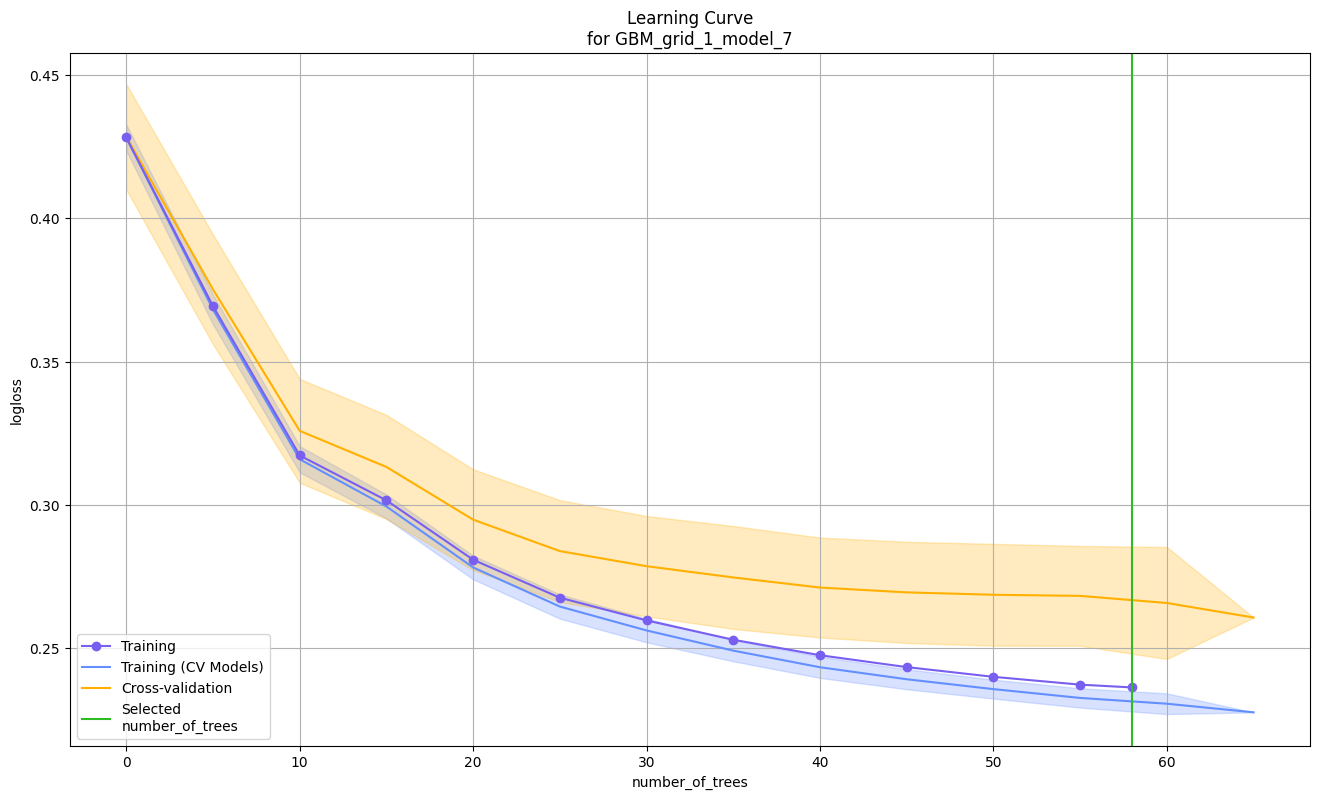

# Variable Importance

> The variable importance plot shows the relative importance of the most important variables in the model.

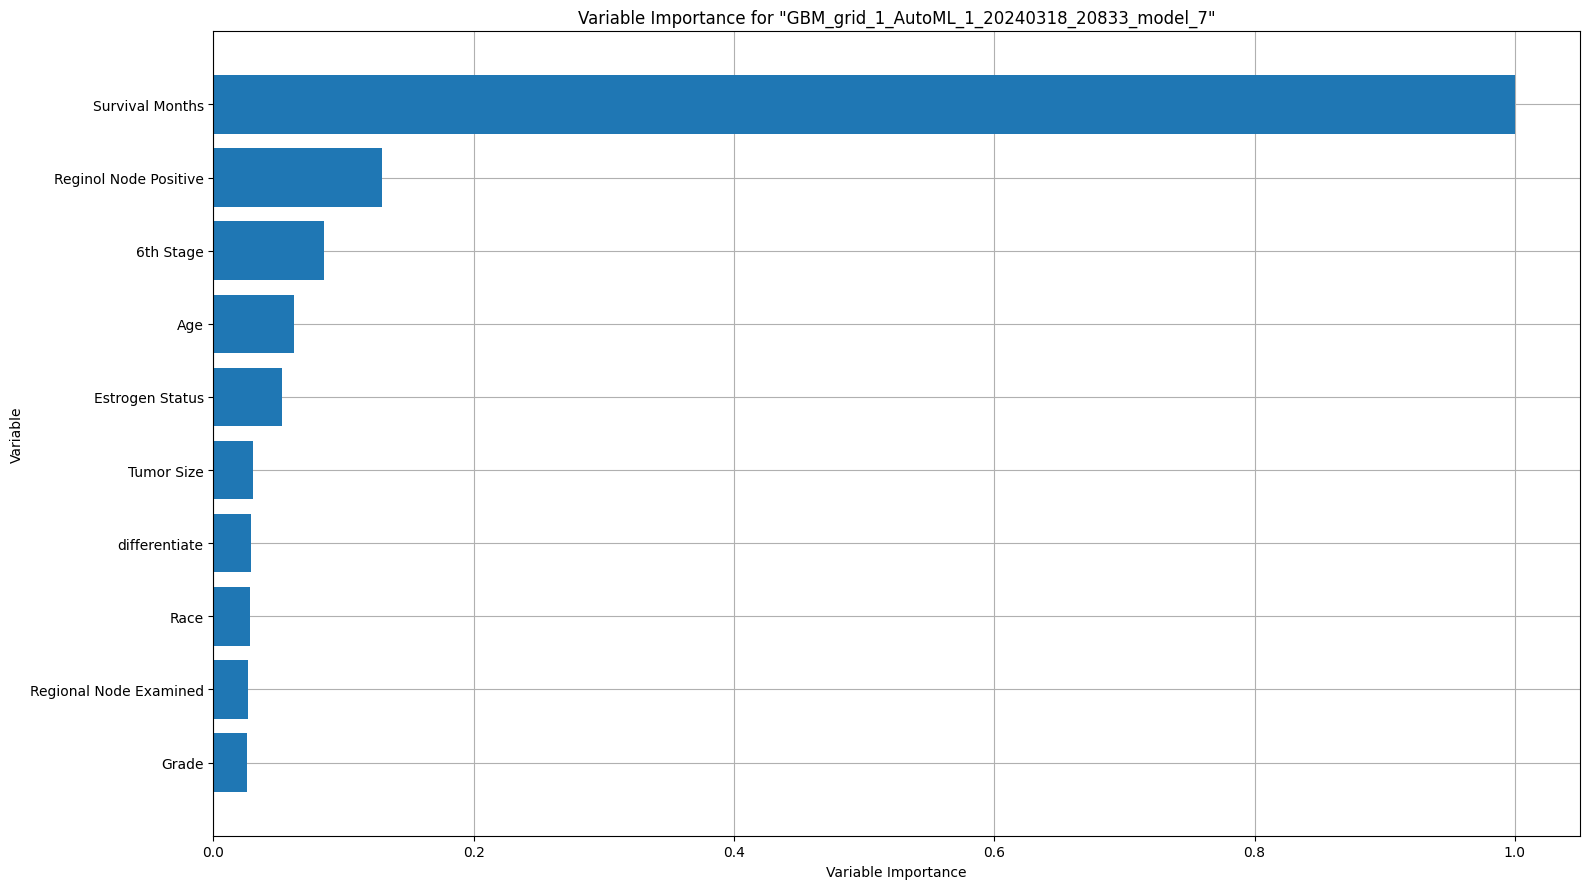

# SHAP Summary

> SHAP summary plot shows the contribution of the features for each instance (row of data). The sum of the feature contributions and the bias term is equal to the raw prediction of the model, i.e., prediction before applying inverse link function.

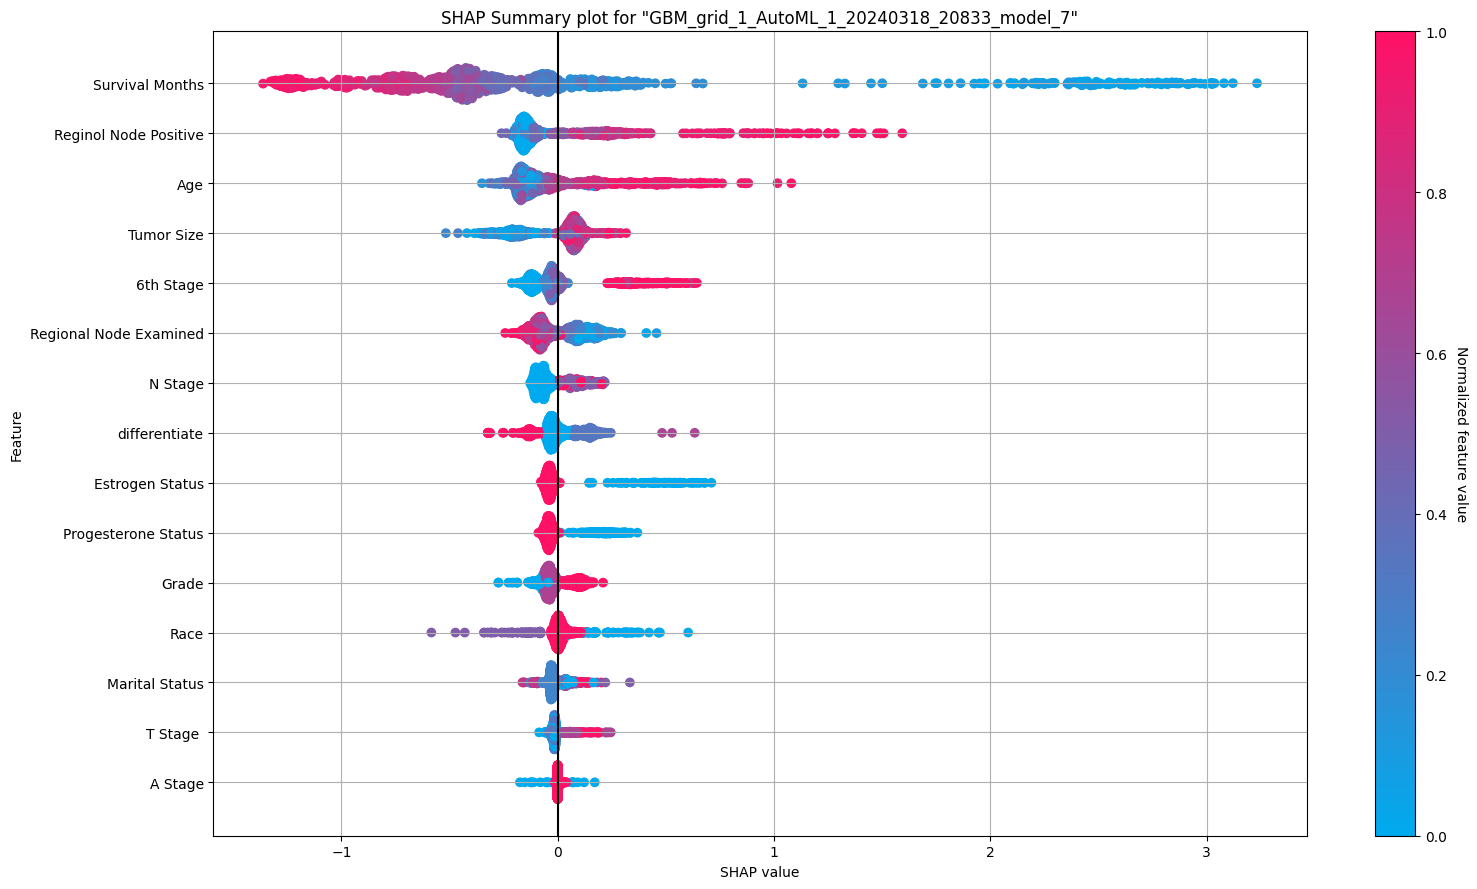

# Partial Dependence Plots

> Partial dependence plot (PDP) gives a graphical depiction of the marginal effect of a variable on the response. The effect of a variable is measured in change in the mean response. PDP assumes independence between the feature for which is the PDP computed and the rest.

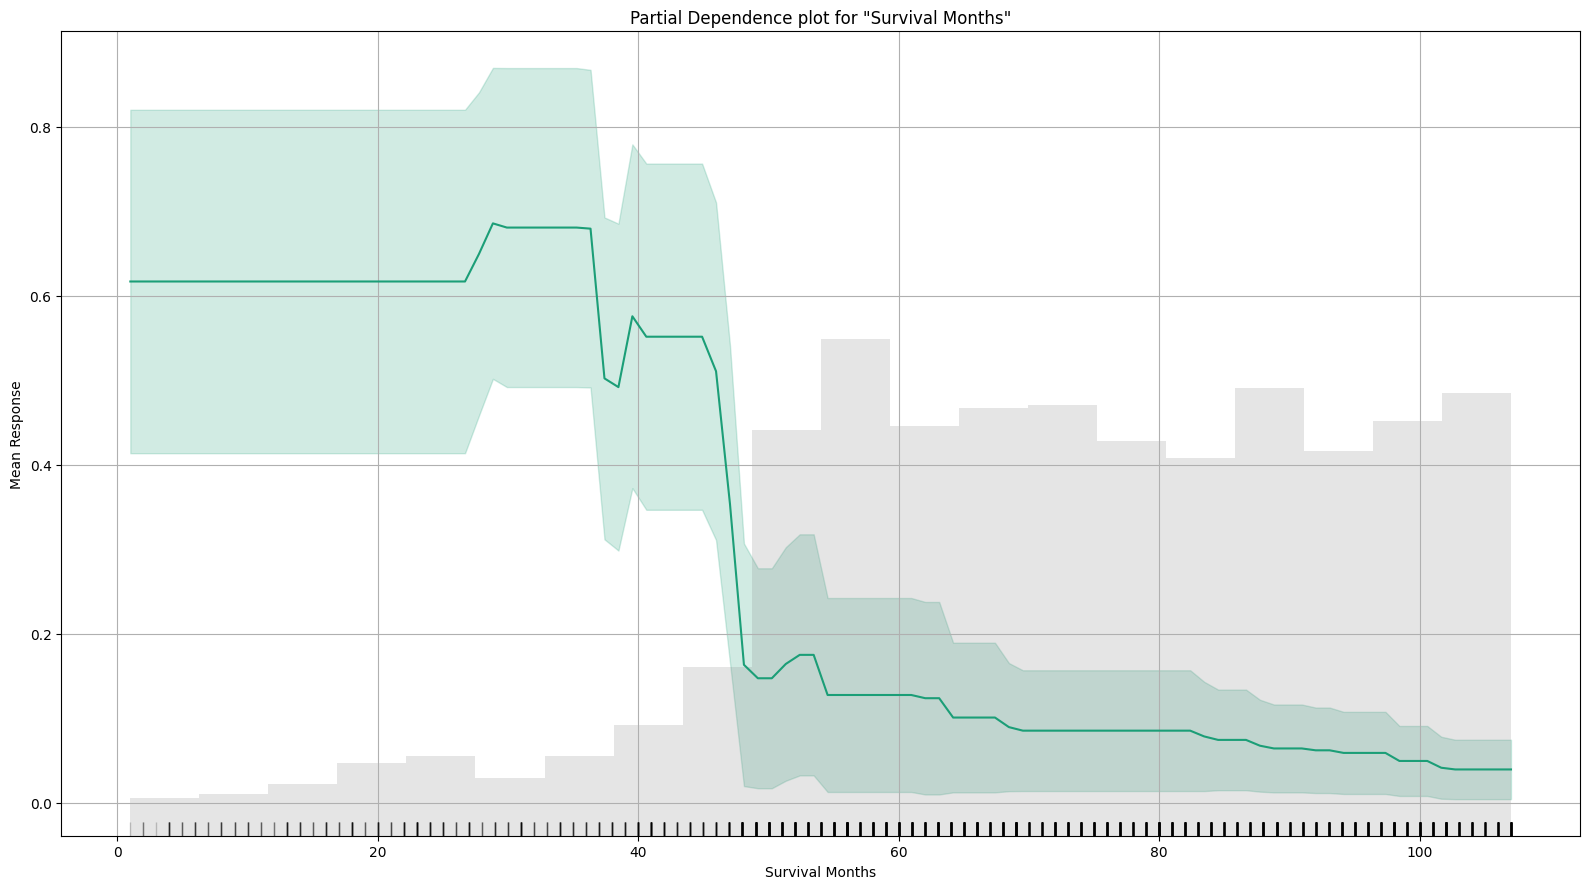

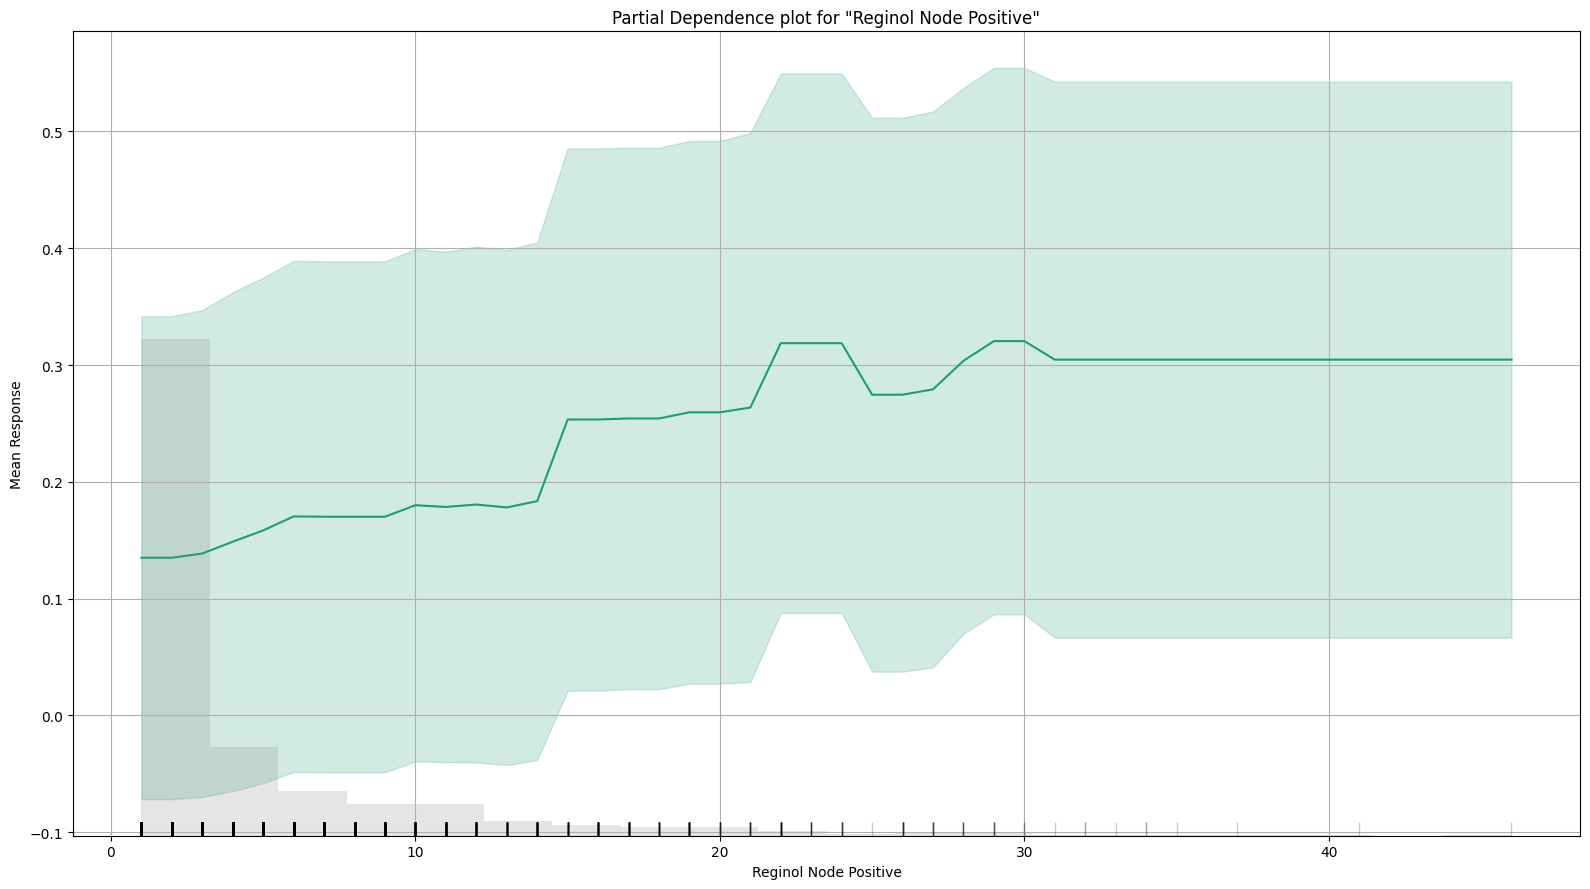

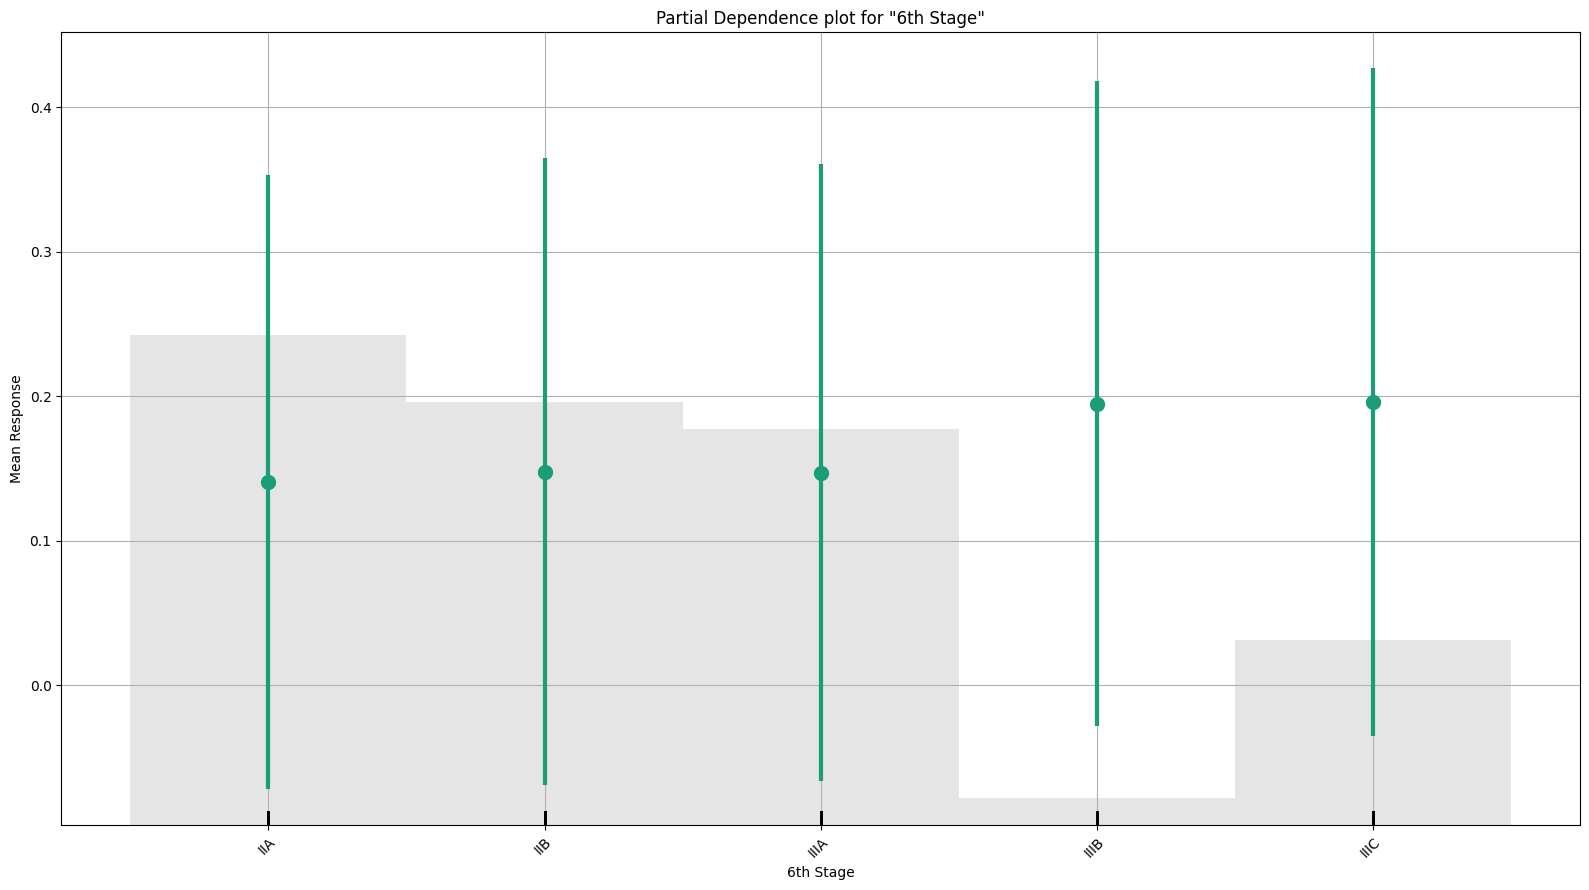

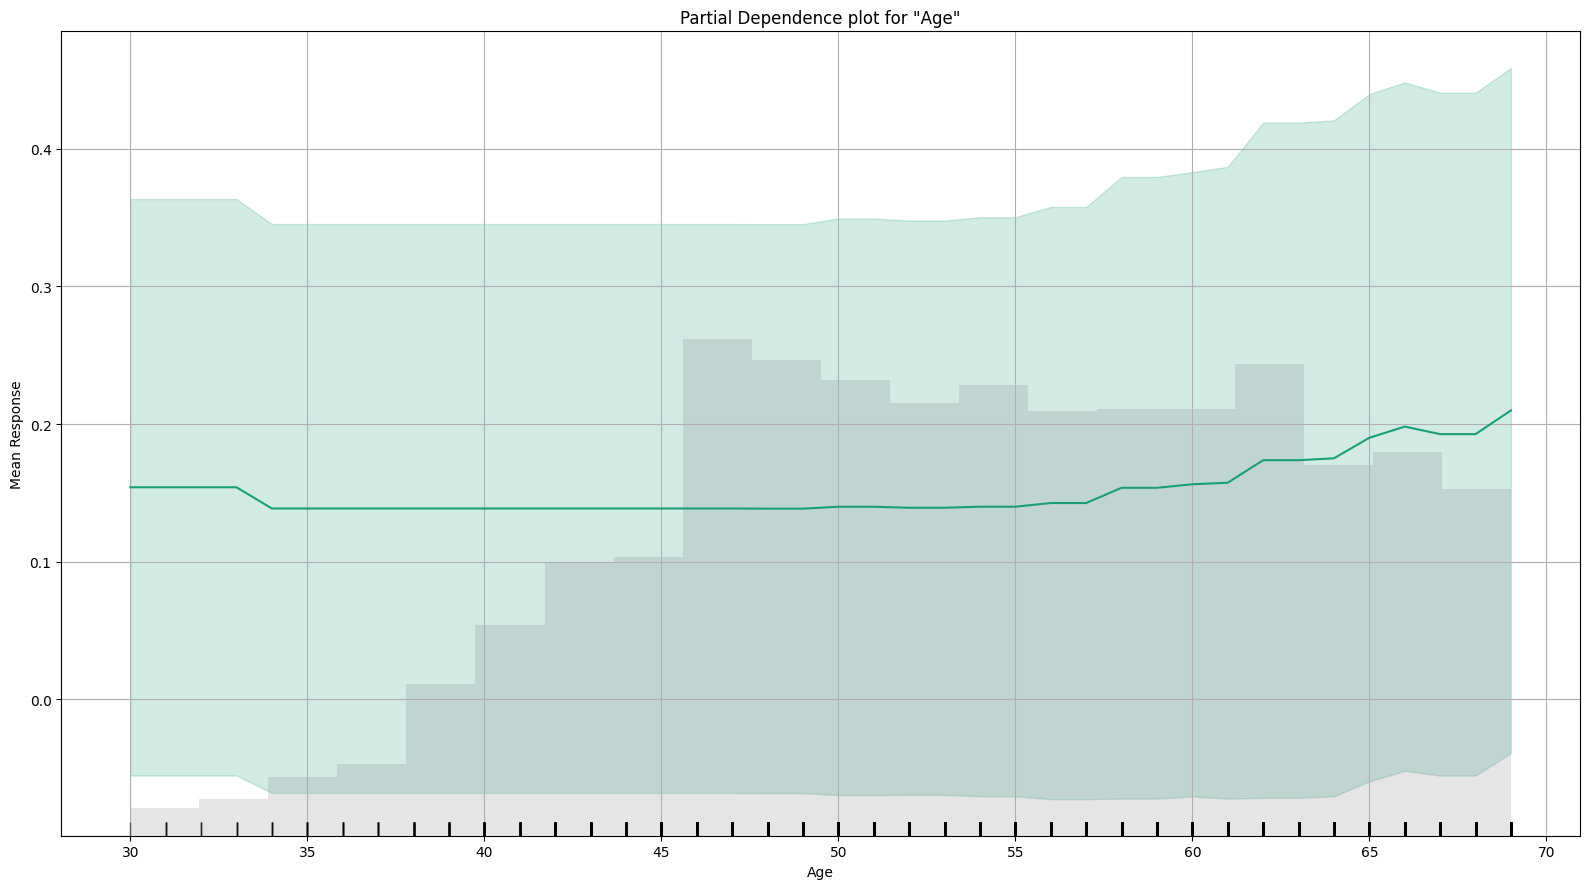

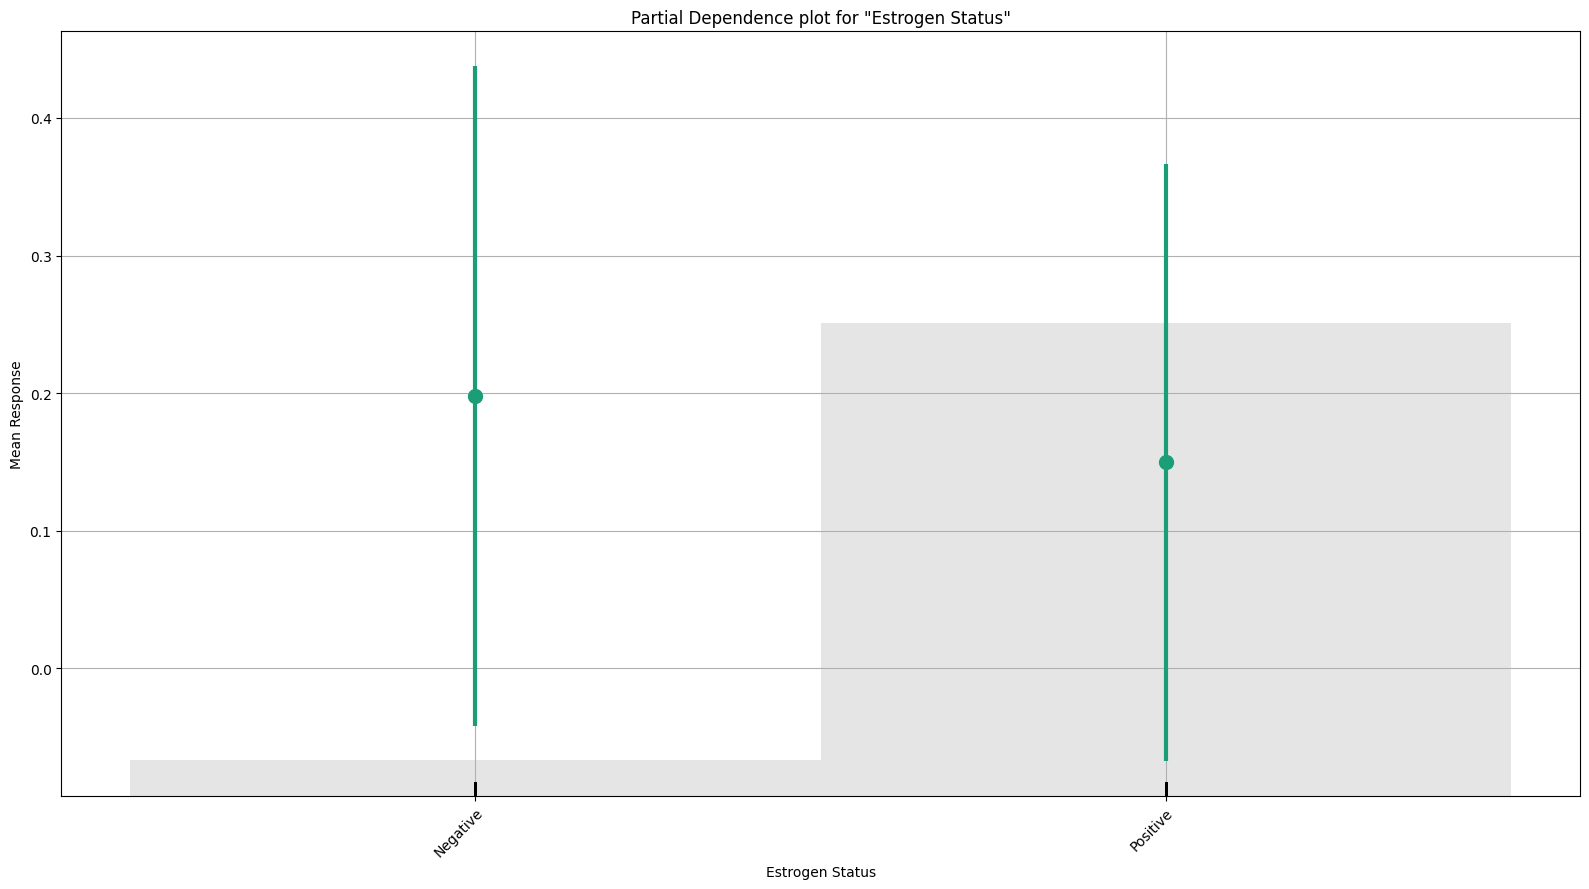

In [ ]:
best_model.explain(data_train)

Model Explanation:

best_model.explain(data_train) generates an explanation of the best model using the training data. This can include feature importance, partial dependence plots, and other diagnostics to understand how the model makes predictions.

In [71]:
best_model.algo

'gbm'

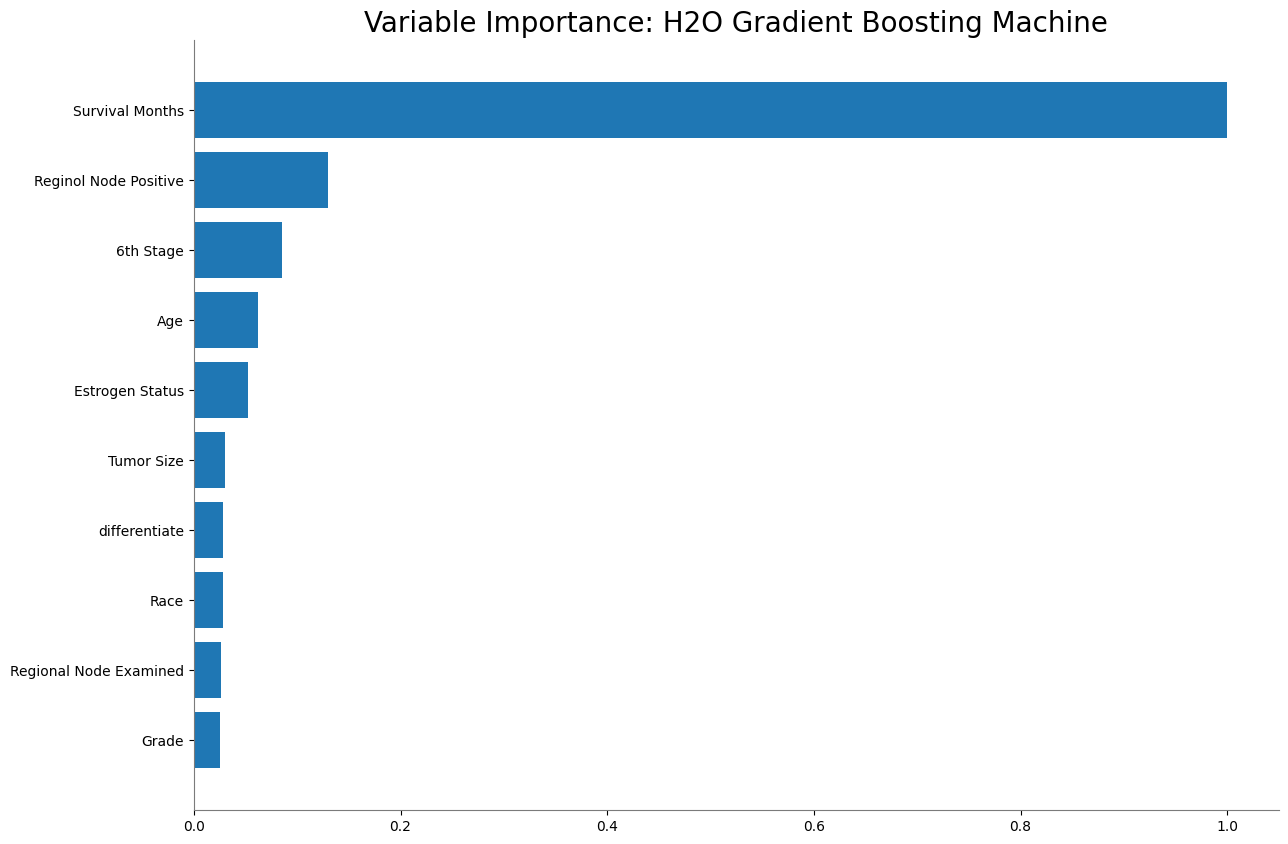

<Figure size 50000x10000 with 0 Axes>

In [ ]:
if best_model.algo in ['gbm','drf','xrt','xgboost']:
  best_model.varimp_plot()

This conditional statement checks if the algorithm (`algo`) used by the `best_model` (presumably obtained from H2O's AutoML leaderboard) is one of the specified tree-based methods: Gradient Boosting Machine (`'gbm'`), Distributed Random Forest (`'drf'`), Extremely Randomized Trees (`'xrt'`), or XGBoost (`'xgboost'`). If `best_model` is indeed using one of these algorithms, the code executes `best_model.varimp_plot()`, which generates a plot showing the variable importance.

Variable importance plots are useful for understanding which features are most influential in predicting the target variable in tree-based models. These plots typically display the features on the y-axis and their importance scores on the x-axis, helping to identify the features that play the most significant role in the model's decisions.

<>:1: SyntaxWarning: "is not" with a literal. Did you mean "!="?
<>:1: SyntaxWarning: "is not" with a literal. Did you mean "!="?
<ipython-input-54-7ab4cd191751>:1: SyntaxWarning: "is not" with a literal. Did you mean "!="?
  if glm_index is not 0:


16
glm


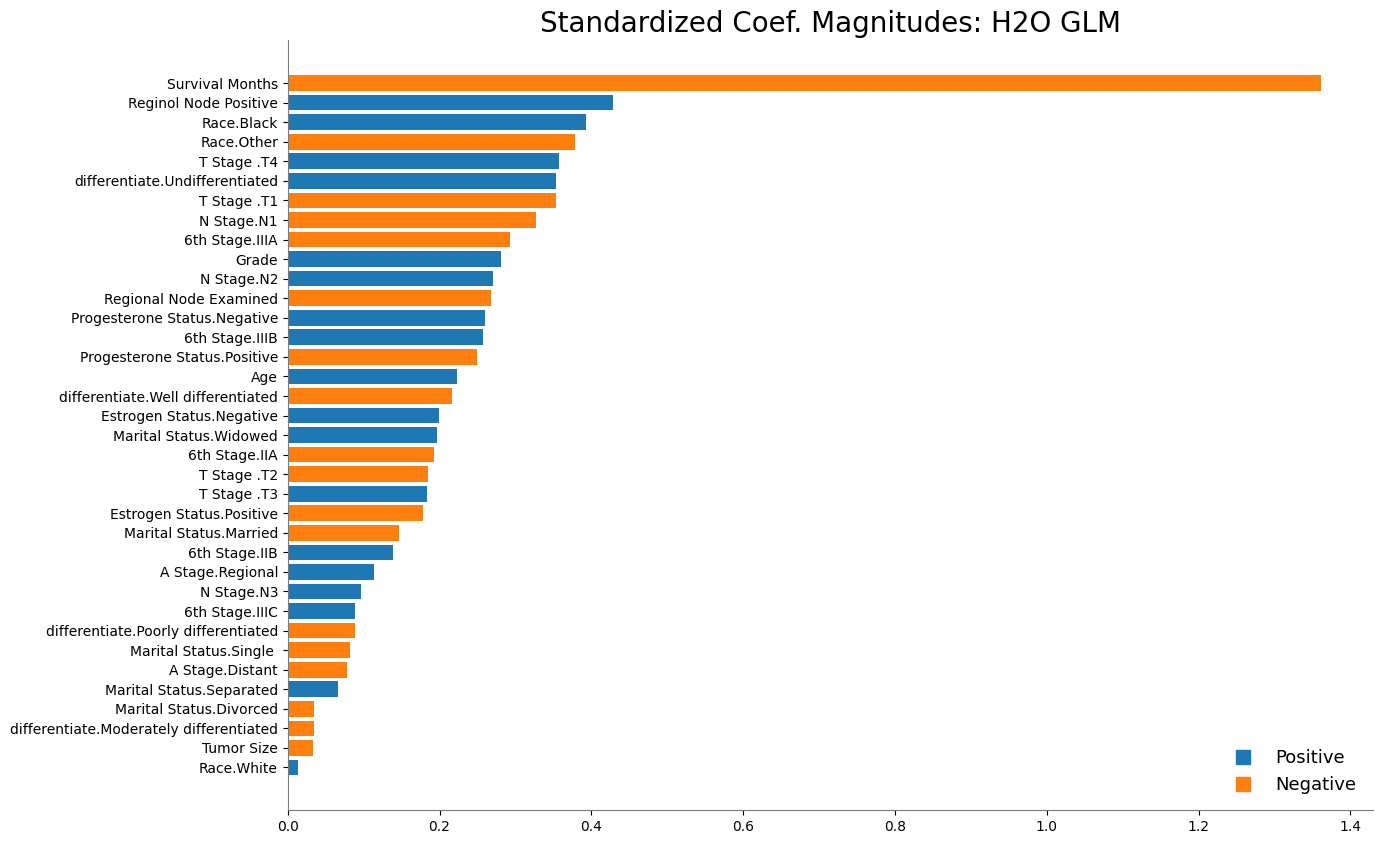

In [ ]:
if glm_index is not 0:
  print(glm_index)
  glm_model=h2o.get_model(auml.leaderboard[glm_index,'model_id'])
  print(glm_model.algo)
  glm_model.std_coef_plot()

This conditional statement and subsequent code block are designed to interact with a Generalized Linear Model (GLM) from an H2O AutoML leaderboard:

1. **Condition Check**: `if glm_index is not 0:` checks if the variable `glm_index` is not equal to `0`. The variable `glm_index` likely represents the position of the first GLM model found in the AutoML leaderboard. A value of `0` would imply that no GLM model was found at the first position (considering Python's zero-based indexing), and a non-zero value indicates the position of a GLM model in the leaderboard.

2. **Print GLM Index**: If the condition is met (i.e., `glm_index` is not `0`), it prints the value of `glm_index`, indicating the position of the GLM model within the AutoML leaderboard.

3. **Retrieve and Print GLM Model Information**:
   - `glm_model=h2o.get_model(auml.leaderboard[glm_index,'model_id'])` retrieves the GLM model from H2O's AutoML leaderboard based on its index (`glm_index`). This line assumes that `auml.leaderboard` can be indexed in this manner, which might require adjusting based on the actual structure of the leaderboard object.
   - `print(glm_model.algo)` prints the algorithm type of the retrieved model, which should output `'glm'` for a Generalized Linear Model.

4. **GLM Standardized Coefficients Plot**:
   - `glm_model.std_coef_plot()` generates a plot of the standardized coefficients for the GLM model. Standardized coefficients represent the importance and direction (positive or negative impact) of each feature in the model, adjusted for the scale of the variables. This visualization is helpful for interpreting the effect of predictors on the target variable in GLM models.

This code effectively checks for a GLM model within the AutoML leaderboard, retrieves it, and provides insights into its algorithm type and the influence of different predictors through a standardized coefficient plot.

In [ ]:
print(best_model.auc(train = True))

0.9077213093399333


This line of code prints the Area Under the Curve (AUC) score of the `best_model` when evaluated on its training dataset. The output value, `0.9077213093399333`, indicates the model's ability to discriminate between the positive and negative classes, with a score closer to 1.0 suggesting excellent model performance.

In [ ]:
def model_performance_stats(perf):
    d={}
    try:
      d['mse']=perf.mse()
    except:
      pass
    try:
      d['rmse']=perf.rmse()
    except:
      pass
    try:
      d['null_degrees_of_freedom']=perf.null_degrees_of_freedom()
    except:
      pass
    try:
      d['residual_degrees_of_freedom']=perf.residual_degrees_of_freedom()
    except:
      pass
    try:
      d['residual_deviance']=perf.residual_deviance()
    except:
      pass
    try:
      d['null_deviance']=perf.null_deviance()
    except:
      pass
    try:
      d['aic']=perf.aic()
    except:
      pass
    try:
      d['logloss']=perf.logloss()
    except:
      pass
    try:
      d['auc']=perf.auc()
    except:
      pass
    try:
      d['gini']=perf.gini()
    except:
      pass
    return d

This function, `model_performance_stats(perf)`, gathers various performance metrics for a given model performance object (`perf`). It attempts to retrieve metrics such as MSE, RMSE, degrees of freedom, deviances, AIC, logloss, AUC, and Gini coefficient. If a particular metric is not applicable or cannot be computed for the model, the function gracefully skips it without error due to the use of try-except blocks. The metrics successfully retrieved are stored in a dictionary `d`, which is returned at the end of the function. This approach ensures the function is versatile and can work with different types of models, returning only the relevant metrics available for each.

In [ ]:
mod_perf=best_model.model_performance(data_test)
stats_test={}
stats_test=model_performance_stats(mod_perf)
stats_test

{'mse': 0.0794859373172388,
 'rmse': 0.2819325048965422,
 'null_degrees_of_freedom': None,
 'residual_degrees_of_freedom': None,
 'residual_deviance': None,
 'null_deviance': None,
 'aic': 'NaN',
 'logloss': 0.27572011850669326,
 'auc': 0.8719422918972967,
 'gini': 0.7438845837945933}

The function `model_performance_stats` was used to extract performance metrics of the `best_model` when evaluated on the `data_test` dataset. The extracted metrics and their values are:

- **mse (Mean Squared Error)**: `0.0794859373172388` - This measures the average squared difference between the estimated values and the actual value, a lower value indicates better performance.
- **rmse (Root Mean Squared Error)**: `0.2819325048965422` - This is the square root of MSE, providing error in the same units as the target variable.
- **null_degrees_of_freedom**: `None` - Not applicable or retrievable for this model.
- **residual_degrees_of_freedom**: `None` - Not applicable or retrievable for this model.
- **residual_deviance**: `None` - Not applicable or retrievable for this model.
- **null_deviance**: `None` - Not applicable or retrievable for this model.
- **aic (Akaike Information Criterion)**: `'NaN'` - Not applicable or retrievable for this model, typically used for model comparison.
- **logloss (Logarithmic Loss)**: `0.27572011850669326` - Measures the performance of a classification model, lower values are better.
- **auc (Area Under the ROC Curve)**: `0.8719422918972967` - Measures the ability of the model to distinguish between classes, closer to 1 indicates excellent model performance.
- **gini**: `0.7438845837945933` - Derived from the AUC, measures model inequality, higher values indicate better discrimination.

These metrics provide a comprehensive view of the model's performance on the test dataset, covering aspects of error measurement, loss, and discriminative power.

## Initialising the shap analysis on the model from step 1,2,3

In [ ]:
!pip install shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 538.2/538.2 kB 8.6 MB/s eta 0:00:00


 This command installs the SHAP library in the current Python environment. SHAP is a tool for explaining the contribution of each feature to the prediction of individual data points in machine learning models.

In [ ]:
import shap

Imports the SHAP library into the Python script, making its functions available for use.

In [ ]:
lg_explainer = shap.Explainer(logreg, x_train)
shap_values_lg = lg_explainer(x_test)

Initializes a SHAP explainer object for the logistic regression model (logreg). This object is trained on x_train, the training data used to fit the logistic regression model. The explainer will use SHAP values to quantify the impact of each feature on the model's predictions.

Uses the explainer to calculate SHAP values for the test dataset (x_test). This results in shap_values_lg, which contains the SHAP values representing the contribution of each feature to the prediction for each observation in x_test.

The resulting SHAP values can be used to interpret the model's predictions in detail, such as understanding which features are driving individual predictions and how they contribute to the model's decision-making process. This insight is valuable for validating model behavior and explaining predictions in transparent and understandable terms.

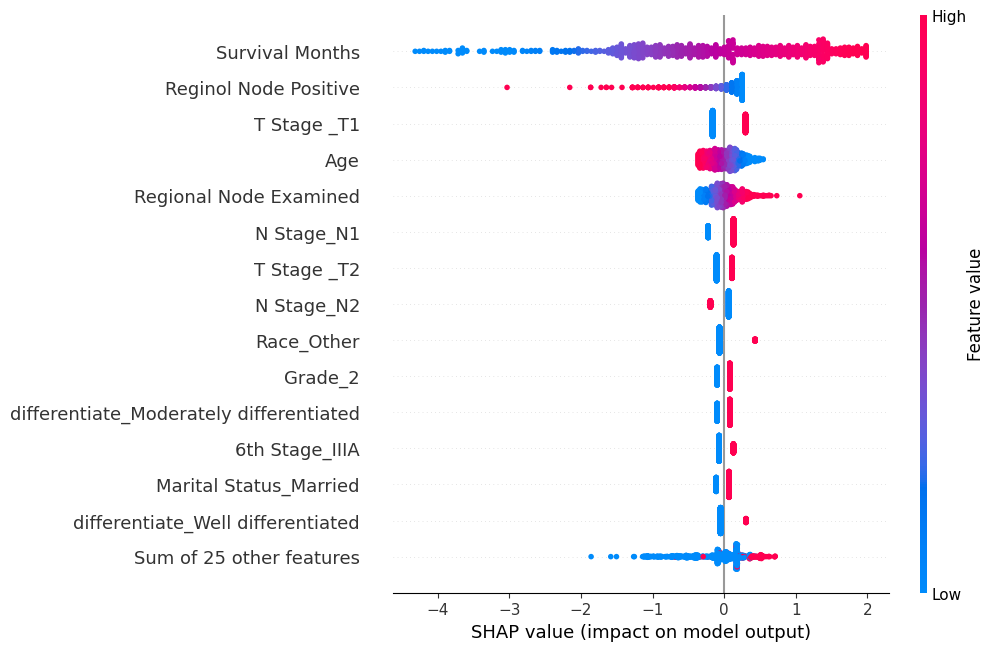

In [72]:
shap.plots.beeswarm(shap_values_lg, max_display=15)

The provided image is a SHAP beeswarm plot that displays the distribution of SHAP values for the top features in a dataset based on their impact on a logistic regression model's output. Each point represents a SHAP value for a feature and an observation:

- Features are listed on the y-axis, ordered by the sum of SHAP value magnitudes over all samples.
- SHAP values on the x-axis represent the impact of that feature on the model's prediction, with values to the right showing an increased likelihood of the positive class, and values to the left indicating an increased likelihood of the negative class.
- The color represents the feature value (red high, blue low).
- This plot helps to identify which features are most influential for the model, and how the value of each feature changes the prediction.

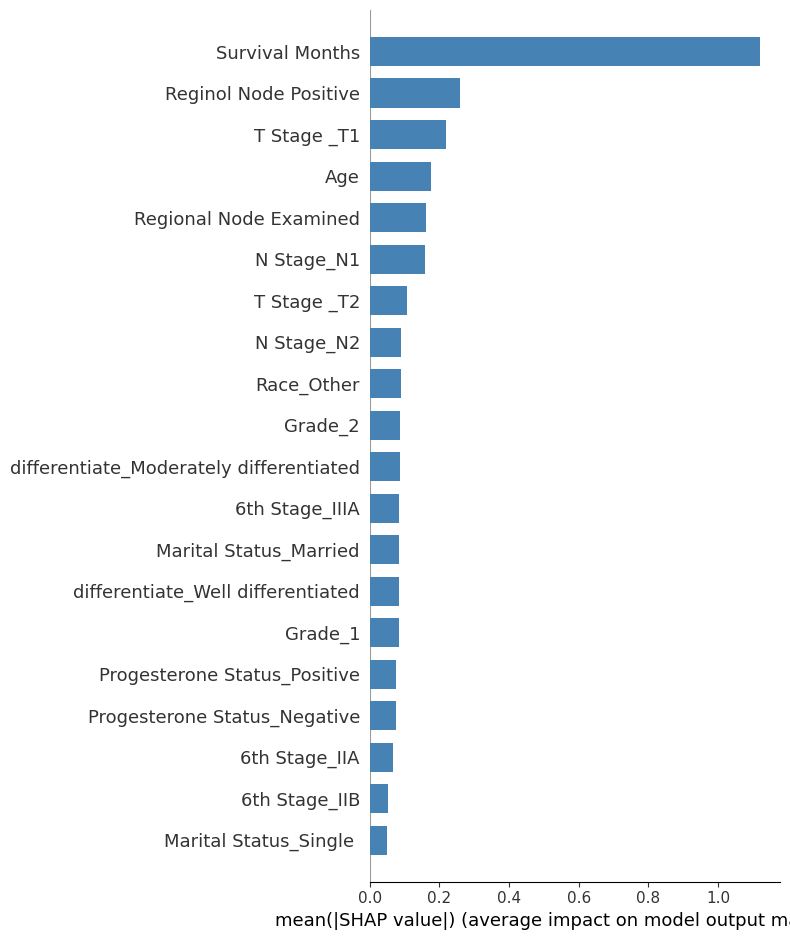

In [ ]:
shap.summary_plot(shap_values_lg, x_train, plot_type="bar", color='steelblue')

The image appears to be a SHAP summary bar plot. This type of plot shows the average impact of each feature on the model's output. The length of the bars represents the average magnitude of the SHAP values across all the data points for each feature, indicating the overall importance of the feature in the model's predictions. Features are ordered from top to bottom by their importance. The color 'steelblue' is specified for the bars, giving a consistent visual representation of the feature importance. This plot provides a global understanding of which features the model is mostly relying on for its predictions.

In [ ]:
explainer = shap.TreeExplainer(xgb_cl)
shap_values = explainer.shap_values(x_train,approximate=False, check_additivity=False)

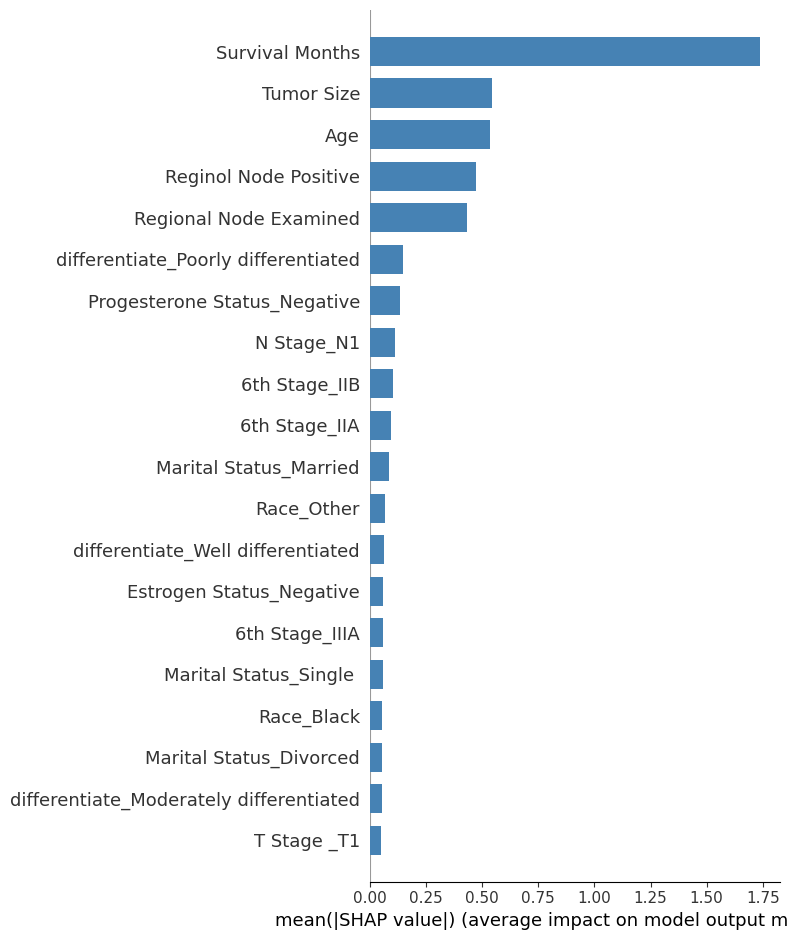

In [ ]:
shap.summary_plot(shap_values, x_train, plot_type="bar", color='steelblue')

The command `shap.summary_plot(shap_values, x_train, plot_type="bar", color='steelblue')` generates a bar plot that summarizes the results from a SHAP analysis:

- **shap_values**: This is an array or a matrix of SHAP values where each row corresponds to an observation in the `x_train` dataset and each column corresponds to a feature.

- **x_train**: The training data that the SHAP values were computed for.

- **plot_type="bar"**: This specifies that the summary plot should be in the form of a bar chart.

- **color='steelblue'**: This sets the color of the bars in the plot to a shade of steel blue.

The resulting bar plot will display the average absolute SHAP values for each feature across all the data points. Each bar's length indicates the average impact of that feature on the model's output, with longer bars representing higher importance. The features are sorted in descending order of importance. This visualization helps to understand which features have the most significant influence on the model's predictions.

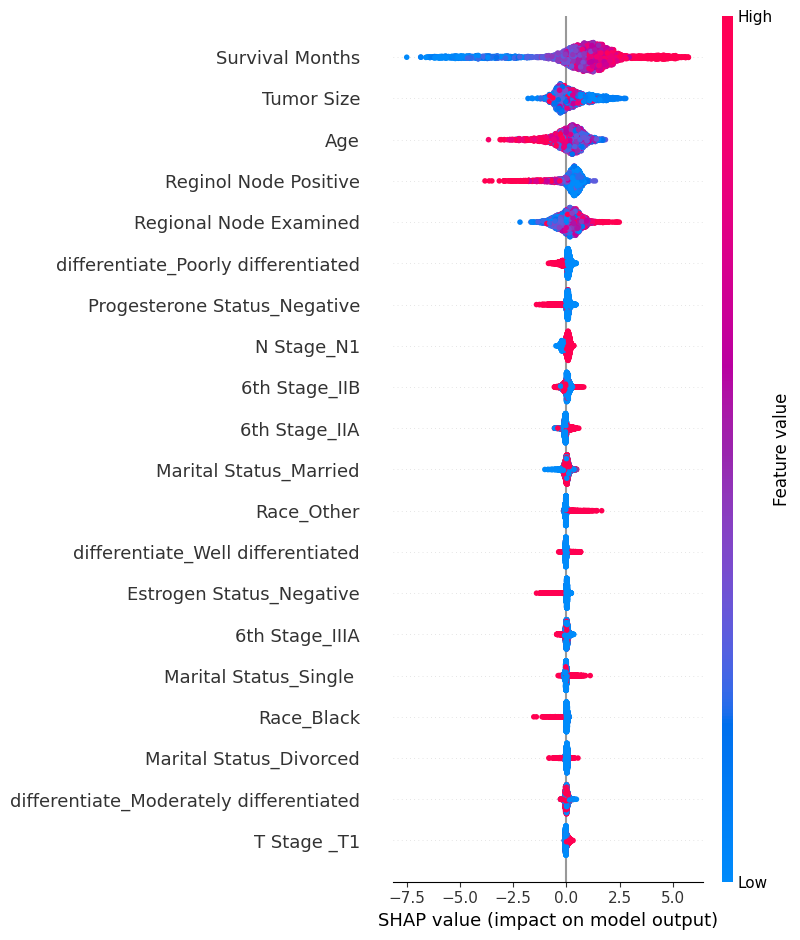

In [ ]:
shap.summary_plot(shap_values, x_train)

# **Questions:**

1.Fit a linear model and interpret the regression coefficients

 For your dataset, after fitting a logistic regression model and interpreting the odds ratios for the coefficients, the findings suggest the following:

- An increase of one unit in "Survival Months" is associated with an increase in the odds of the event of interest in the target class by approximately 3.96 times compared to the reference class, holding all other variables constant.
- Being of "Other" race is associated with an increase in the odds of the event of interest in the target class by about 1.64 times compared to the base race category.
- Having a "T Stage" of T1 is associated with an increase in the odds of the event of interest in the target class by approximately 1.58 times compared to other T stages.
- "Well differentiated" tumor differentiation is associated with an increase in the odds of the event of interest in the target class by about 1.43 times compared to less differentiated categories.

These interpretations assume that the logistic regression model is appropriate for the data and that the relationships are linear on the log-odds scale. Each odds ratio represents the change in the odds of a positive outcome (for example, being alive in a survival analysis context) for a one-unit increase in the predictor variable or the presence of a categorical feature, holding other variables constant.

2.Fit a tree-based model and interpret the nodes.

The plotted tree shows the decision-making process starting from the root node down to the leaves. Each node represents a decision based on one of the features, such as age, tumor size, or estrogen status. The decisions are made based on thresholds that split the data to maximize the separation of the classes (e.g., "Alive" or "Dead" in the breast cancer context).

Root Node: The top-most node (root) represents the initial split made by the model based on the feature that provides the most significant information gain at the start. For example, if the root node is based on 'Tumor Size', it means that this feature was found to be the most critical factor in determining the initial split towards predicting the outcome.

Intermediate Nodes: These nodes represent further splits based on other features. Each split aims to further segregate the data into groups with similar outcomes. The feature and threshold for splitting are chosen to maximize the purity of the nodes.

Leaf Nodes: The final nodes (leaves) represent the predictions. In classification tasks, each leaf node will be associated with a class probability. The path from the root to a leaf represents the conjunction of conditions leading to a particular prediction.

For the breast cancer dataset, interpreting the first few trees can provide insights into which features are most influential in predicting the patient's status (e.g., "Alive" or "Dead") and how different feature values contribute to these predictions. The specific paths in the tree highlight the combinations of feature conditions that are most indicative of each outcome, offering valuable insights for understanding the model's decision logic

3.Use auto ml to find the best model.


ANS
This output provides an evaluation of a stacked ensemble model's performance on cross-validation data using various statistical measures:

- **MSE (Mean Squared Error)**: Measures the average squared difference between predicted and actual values; a lower MSE indicates a model with better predictive accuracy.
  
- **RMSE (Root Mean Squared Error)**: The square root of MSE; lower RMSE values signify higher accuracy.

- **LogLoss (Logarithmic Loss)**: A performance metric for classification models where a lower LogLoss value indicates a model that makes predictions with higher confidence.

- **AUC (Area Under the ROC Curve)**: Reflects the model's ability to discriminate between classes; a higher AUC value implies a better-performing model.

- **AUCPR (Area Under the Precision-Recall Curve)**: Similar to AUC but focuses on the model's performance in the positive class; higher is better, particularly for imbalanced datasets.

- **Gini**: Derived from the AUC and measures inequality; twice the AUC minus 1, where higher Gini suggests better discrimination.

- **Null degrees of freedom**: Associated with the baseline model, not applicable here as it's `None`.

- **Residual degrees of freedom**: Related to the model with predictors, also `None` here.

- **Null deviance**: Measure of the model with only the intercept; lower suggests the model explains more variation.

- **Residual deviance**: Measure for the fitted model; like null deviance, lower values are better.

- **AIC (Akaike Information Criterion)**: Estimates the relative amount of information lost by a model; lower AIC suggests a model closer to the truth.

- **Confusion Matrix**: Shows the number of correct and incorrect predictions compared with the actual values; the provided threshold maximizes the F1 score.

- **Maximum Metrics**: Displays the best scores achieved for various metrics at their respective thresholds.

- **Gains/Lift Table**: Illustrates how much better the model is at predicting the positive class compared to random guessing, useful for determining the effectiveness of targeting a proportion of cases.

In summary, the model is performing well with an AUC of about 0.87 indicating good discriminative ability. The confusion matrix and associated threshold indicate where the model maximizes the F1 score, balancing precision and recall. The Gini coefficient confirms the model's good discriminative power, and the Gains/Lift table showcases the model's effectiveness at various levels of targeting.

4.Run SHAP analysis on the models from steps 1, 2, and 3, interpret the SHAP values and compare them with the other model interpretability methods.

ANS 4
After conducting a SHAP analysis on the model, the beeswarm plot indicates that 'Survival Months' is the most influential feature affecting the model's output. Features like 'Tumor Size' and 'Age' also have significant impacts, with their higher values associated with larger shifts in the model's predictions. The plot shows that greater values of 'Survival Months', 'Tumor Size', and 'Age' are linked with the event the model is predicting.

On the other end of the spectrum, features at the bottom of the plot, such as 'Race_Black' and 'Marital Status_Single', appear to have a lesser impact on the model's predictions. Their SHAP values suggest smaller shifts in the predicted outcome compared to the top features.

The colors in the plot (not visible in the text description, but typically red for high and blue for low) represent the magnitude of the feature values, affecting the prediction in opposing directions. For instance, higher 'Survival Months' may increase the probability of the event being predicted, while lower 'Survival Months' could decrease it.

While each dot represents the SHAP value for a feature for an individual prediction, indicating the direction and strength of the feature's impact, the aggregation in the plot provides an overall view of the feature contributions across the dataset, aiding in understanding the model's decision-making process.


# **LICENSE**

Copyright (c) 2023 Nisha Sirdesai

Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.

### References
1)https://towardsdatascience.com/interpreting-coefficients-in-linear-and-logistic-regression-6ddf1295f6f1

2)https://towardsdatascience.com/decision-trees-explained-3ec41632ceb6

3)https://www.analyticsvidhya.com/blog/2020/05/decision-tree-vs-random-forest-algorithm/

4)https://www.analyticsvidhya.com/blog/2020/10/all-about-decision-tree-from-scratch-with-python-implementation/

5)https://www.kdnuggets.com/2020/04/visualizing-decision-trees-python.html

6)https://www.datacamp.com/community/tutorials/xgboost-in-python

7)https://github.com/ajhalthor/model-interpretability/blob/main/Shap%20Values.ipynb

